<h1><center>Lending Club Case Study</center></h1>

<div style="text-align: right"> Submitted By:
<br>Ravi Dhir \ Kashif Sami</div>

## Contents

* [1. Introduction](#1)
 * [1.1 About the Company](#1.1)
 * [1.2 Business Objective](#1.2)
* [2. Import the Data](#2)
 * [2.1 Import Required Libraries](#2.1)
 * [2.2 Import and Clean Data](#2.2)
   * [2.2.1 Creating and  Loading Data Frame](#2.2.1)
   * [2.2.2 Remove Columns >30% Null](#2.2.2)
   * [2.2.3 Cleaning the columns - Stripping Spaces, Matching Lowercare](#2.2.3)
   * [2.2.4 Creating an Index Column](#2.2.4)  
   * [2.2.5 Remove Duplicate Columns](#2.2.5)
   * [2.2.6 Dealing with Rows having only 1 Value or Many Zeros](#2.2.6)
   * [2.2.6 Dealing with Missing Values](#2.2.6)
   * [2.2.7 Remove Unwanted Columns](#2.2.7)
   * [2.2.8 Dealing with Missing Values](#2.2.8)
   * [2.2.9 Change Data Types](#2.2.9)
      * [2.2.9.1 Dealing with Date Data Types](#2.2.9.1)
      * [ 2.2.9.2 Dealing with Continuous (Numerical) Data Types](#2.2.9.2)
   * [2.2.10 Remove current loans](#2.2.10)
* [3 Derived Metrics](#3)
 * [3.1 Extract Year and Month from issue_dy](#3.1)
 * [3.2. Loan amount to Annual Income ratio](#3.2)
 * [3.3.  Getting List of  States from addr_state](#3.3)
 * [3.4.  Creating Closed Lines of Credit column](#3.4)
 * [3.5. Creating bins for Continuous Data](#3.5)
 * [3.6. Create Charged_Off column](#3.6)
 * [3.7. Create active_pymnt_days Column](#3.7)
 * [3.8. Income Category](#3.8) 
* [4 Data Analysis](#4)
 * [4.1 Identify Key Variables for Analysis](#4.1)
 * [4.2 Analysis Approach](#4.2)
 * [4.3 Loan Applicant's Attributes](#4.3)
    * [4.3.1 Home ownership analysis](#4.3.1)
      * [4.3.1.1 Home_ownership Univariate Analysis](#4.3.1.1)
      * [4.3.1.2 Home_ownership Segmented Univariate Analysis](#4.3.1.2)
    * [4.3.2 us_state analysis](#4.3.2)
    * [4.3.3 Verification Status analysis](#4.3.3)
    * [4.3.4 Revolving Line Utilization Rate (revol_util) Analysis](#4.3.4)
    * [4.3.5 Customer Cerdit Lines Analysis](#4.3.5)
    * [4.3.6 Credit Inquiries in last 6 months Analysis](#4.3.6)
 * [4.4 Requested Loan  Attributes](#4.4)
    * [4.4.1 Loan Amount Analysis](#4.4.1)
    * [4.4.2 Term  Analysis](#4.4.2)
    * [4.4.3 Purpose Analysis](#4.4.3)
 * [4.5 Approved Loan  Attributes](#4.5)
     * [4.5.1 Active Payment Days (active_pymnt_days) Analysis](#4.5.1)
     * [4.5.2 Grade](#4.5.2) 
     * [4.5.3 Interest Rate](#4.5.3)  
       * [4.5.3.1 Removing Outliers](#4.5.3.1)  
 * [4.6 Bivariate Analysis of various variable types (buckets)](#4.6) 
     * [4.6.1 Bivariate Analysis with Loan Grade](#4.6.1) 
     * [4.6.2 Bivariate Analysis with loan Purpose, income category](#4.6.2) 
     * [4.6.3 Bivariate Analysis with loan Purpose, loan amount](#4.6.3) 
* [5 References](#5) 

<a id="1"></a>
## 1. Introduction


<a id="1.1"></a>
**About the Company:** [LendingClub](https://www.lendingclub.com/) is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 


<a id="1.2"></a>
**Business Objective:** Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who __default__ cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. <br/>

__The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.__


## 2. Import  Data - Lock and Load!
<a id="2"></a>

In this section, we will clean and load the Data in a master DataFrame to analyse further.

<a id="2.1"></a>
### 2.1 Import Required Libraries


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
import datetime
import random
from scipy import special

In [2]:
# Set Parameters for Displaying data
pd.set_option('display.max_columns', 120)
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
sns.set_style("whitegrid")
%matplotlib inline

<a id="2.2"></a>
### 2.2 Import & Clean Data


<a id="2.2.1"></a>
#### 2.2.1 Creating and  Loading Data Frame


In [3]:
loans=pd.read_csv("loan.csv",low_memory=False)
loans.head(1)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000         4,975.00   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   

   annual_inc verification_status issue_d loan_status pymnt_plan  \
0   24,000.00            Verified  Dec-11  Fully Paid          n   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   

  zip_code addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ 27.65            0           Jan-85               1   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     nan                     nan         3        0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      13648     83.70%          9                   f       0.00   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00     5,863.16         5,833.84         5,000.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             May-16   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                        0.00                          nan            1   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               nan        nan                        nan   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0               0           nan          nan          nan         nan   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          nan          nan                 nan           nan      nan   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          nan          nan         nan       nan               nan     nan   

   total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  \
0          nan           nan                   nan          nan   

   bc_open_to_buy  bc_util  chargeoff_within_12_mths  delinq_amnt  \
0             nan      nan                      0.00            0   

   mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  \
0                 nan                   nan                    nan   

   mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc  mths_since_recent_bc_dlq  \
0             nan       nan                   nan                       nan   

   mths_since_recent_inq  mths_since_recent_revol_delinq  \
0                    nan                             nan   

   num_accts_ever_120_pd  num_actv_bc_tl  num_actv_rev_tl  num_bc_sats  \
0                    nan             nan              nan          nan   

   num_bc_tl  num_il_tl  num_op_rev_tl  num_rev_accts  num_rev_tl_bal_gt_0  \
0        nan        nan            nan            nan                  nan   

   num_sats  num_tl_120dpd_2m  num_tl_30dpd  num_tl_90g_dpd_24m  \
0       nan               nan           nan                 nan   

   num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  \
0                 nan             nan               nan                  0.00   

   tax_liens  tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
0       0.00              nan                nan             nan   

   total_il_high_credit_limit  
0                         nan

In [4]:
loans.shape
# Data Contains 39,717 rows and 111 columns

(39717, 111)

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


> **Observation:** Our DataFrame is initially ~34MB , contains 111 columns and ~40k rows

<a id="2.2.2"></a>
#### 2.2.2 Remove Columns >30% Null


The Columns having most Null Values wil not be very usefeul in analysis, so let's remove them.

In [6]:
#Looking at columns with NaN Values
loans.isnull().sum().sort_values(ascending=False)

total_il_high_credit_limit     39717
mo_sin_old_rev_tl_op           39717
bc_util                        39717
bc_open_to_buy                 39717
avg_cur_bal                    39717
acc_open_past_24mths           39717
inq_last_12m                   39717
total_cu_tl                    39717
inq_fi                         39717
total_rev_hi_lim               39717
all_util                       39717
max_bal_bc                     39717
open_rv_24m                    39717
open_rv_12m                    39717
il_util                        39717
total_bal_il                   39717
mths_since_rcnt_il             39717
open_il_24m                    39717
open_il_12m                    39717
open_il_6m                     39717
open_acc_6m                    39717
tot_cur_bal                    39717
tot_coll_amt                   39717
total_bc_limit                 39717
dti_joint                      39717
annual_inc_joint               39717
mths_since_last_major_derog    39717
m

In [7]:
loans = loans.loc[:, loans.isnull().mean() <= .3]

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

> **Note:** We now have 53 columns for analysis. Now, let's clean the Data further

<a id="2.2.3"></a>
#### 2.2.3 Cleaning the columns - Stripping Spaces, Matching Lowercare


In [9]:
# Stripping all the columns, so there are no leading or trailing white space
loans=loans.apply(lambda x: x.str.strip()if x.dtype == "object" else x)

In [10]:
# Convert Data to lower
loans=loans.apply(lambda x: x.str.lower()if x.dtype == "object" else x)

In [11]:
loans.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  1077501    1296599       5000         5000         4,975.00  36 months   
1  1077430    1314167       2500         2500         2,500.00  60 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     b        b2       NaN  10+ years           rent   
1   15.27%        59.83     c        c4     ryder   < 1 year           rent   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0   24,000.00            verified  dec-11   fully paid          n   
1   30,000.00     source verified  dec-11  charged off          n   

                                                 url      purpose     title  \
0  https://lendingclub.com/browse/loandetail.acti...  credit_card  computer   
1  https://lendingclub.com/browse/loandetail.acti...          car      bike   

  zip_code addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         az 27.65            0           jan-85               1   
1    309xx         ga  1.00            0           apr-99               5   

   open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  \
0         3        0      13648     83.70%          9                   f   
1         3        0       1687      9.40%          4                   f   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00     5,863.16         5,833.84         5,000.00   
1       0.00           0.00     1,008.71         1,008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0       jan-15           171.62             may-16   
1       apr-13           119.66             sep-13   

   collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  \
0                        0.00            1       individual               0   
1                        0.00            1       individual               0   

   chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens  
0                      0.00            0                  0.00       0.00  
1                      0.00            0                  0.00       0.00

<a id="2.2.4"></a>
#### 2.2.4 Creating an Index Column


In [12]:
loans.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     27209
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         17426
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

> **Note:** From above result, we see that both ID , member ID columns are unique. Let's use ID columns as Index columns.

In [13]:
# Rename column as Loan ID
loans.rename(columns={'id':'loan_id'},inplace=True)

In [14]:
loans.set_index('loan_id',inplace=True)

In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 52 columns):
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_plan                    39717 non-null object
u

In [16]:
loans.head(2)

member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
loan_id                                                                  
1077501    1296599       5000         5000         4,975.00  36 months   
1077430    1314167       2500         2500         2,500.00  60 months   

        int_rate  installment grade sub_grade emp_title emp_length  \
loan_id                                                              
1077501   10.65%       162.87     b        b2       NaN  10+ years   
1077430   15.27%        59.83     c        c4     ryder   < 1 year   

        home_ownership  annual_inc verification_status issue_d  loan_status  \
loan_id                                                                       
1077501           rent   24,000.00            verified  dec-11   fully paid   
1077430           rent   30,000.00     source verified  dec-11  charged off   

        pymnt_plan                                                url  \
loan_id                                                                 
1077501          n  https://lendingclub.com/browse/loandetail.acti...   
1077430          n  https://lendingclub.com/browse/loandetail.acti...   

             purpose     title zip_code addr_state   dti  delinq_2yrs  \
loan_id                                                                 
1077501  credit_card  computer    860xx         az 27.65            0   
1077430          car      bike    309xx         ga  1.00            0   

        earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
loan_id                                                                  
1077501           jan-85               1         3        0      13648   
1077430           apr-99               5         3        0       1687   

        revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
loan_id                                                                       
1077501     83.70%          9                   f       0.00           0.00   
1077430      9.40%          4                   f       0.00           0.00   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
loan_id                                                                 
1077501     5,863.16         5,833.84         5,000.00         863.16   
1077430     1,008.71         1,008.71           456.46         435.17   

         total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
loan_id                                                                         
1077501                0.00        0.00                     0.00       jan-15   
1077430                0.00      117.08                     1.11       apr-13   

         last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
loan_id                                                                   
1077501           171.62             may-16                        0.00   
1077430           119.66             sep-13                        0.00   

         policy_code application_type  acc_now_delinq  \
loan_id                                                 
1077501            1       individual               0   
1077430            1       individual               0   

         chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  \
loan_id                                                                
1077501                      0.00            0                  0.00   
1077430                      0.00            0                  0.00   

         tax_liens  
loan_id             
1077501       0.00  
1077430       0.00

<a id="2.2.5"></a>
#### 2.2.5 Remove Duplicate Columns

First, we will create a Function to identify the Duplicate Columns and then, if we find any duplicate column, we will remove them from the DataFrame.

In [17]:
# Function to identify Duplicate Columns
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [18]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(loans)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  chargeoff_within_12_mths
Column name :  delinq_amnt


In [19]:
# Let's rename delinq_amount to - delinq_amnt_12m_chargeoff
loans.rename(columns={'delinq_amnt':'delinq_amnt_12m_chargeoff'},inplace=True)

In [20]:
# Drop the chargeoff_within_12_mths Column
loans.drop(['chargeoff_within_12_mths'], axis=1,inplace=True)

In [21]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 51 columns):
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_plan                    39717 non-null object
u

In [22]:
loans.head(2)

member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
loan_id                                                                  
1077501    1296599       5000         5000         4,975.00  36 months   
1077430    1314167       2500         2500         2,500.00  60 months   

        int_rate  installment grade sub_grade emp_title emp_length  \
loan_id                                                              
1077501   10.65%       162.87     b        b2       NaN  10+ years   
1077430   15.27%        59.83     c        c4     ryder   < 1 year   

        home_ownership  annual_inc verification_status issue_d  loan_status  \
loan_id                                                                       
1077501           rent   24,000.00            verified  dec-11   fully paid   
1077430           rent   30,000.00     source verified  dec-11  charged off   

        pymnt_plan                                                url  \
loan_id                                                                 
1077501          n  https://lendingclub.com/browse/loandetail.acti...   
1077430          n  https://lendingclub.com/browse/loandetail.acti...   

             purpose     title zip_code addr_state   dti  delinq_2yrs  \
loan_id                                                                 
1077501  credit_card  computer    860xx         az 27.65            0   
1077430          car      bike    309xx         ga  1.00            0   

        earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
loan_id                                                                  
1077501           jan-85               1         3        0      13648   
1077430           apr-99               5         3        0       1687   

        revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
loan_id                                                                       
1077501     83.70%          9                   f       0.00           0.00   
1077430      9.40%          4                   f       0.00           0.00   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
loan_id                                                                 
1077501     5,863.16         5,833.84         5,000.00         863.16   
1077430     1,008.71         1,008.71           456.46         435.17   

         total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
loan_id                                                                         
1077501                0.00        0.00                     0.00       jan-15   
1077430                0.00      117.08                     1.11       apr-13   

         last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
loan_id                                                                   
1077501           171.62             may-16                        0.00   
1077430           119.66             sep-13                        0.00   

         policy_code application_type  acc_now_delinq  \
loan_id                                                 
1077501            1       individual               0   
1077430            1       individual               0   

         delinq_amnt_12m_chargeoff  pub_rec_bankruptcies  tax_liens  
loan_id                                                              
1077501                          0                  0.00       0.00  
1077430                          0                  0.00       0.00

<a id="2.2.6"></a>
#### 2.2.6 Dealing with Columns having only 1 Value

<br>
The rows which have only one value are not much useful for analysis and can be removed.

In [23]:
loans.nunique()

member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     27209
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         17426
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                     

In [24]:
loans[['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq'
     ,'delinq_amnt_12m_chargeoff','pub_rec_bankruptcies','tax_liens']].head(1)

pymnt_plan initial_list_status  collections_12_mths_ex_med  \
loan_id                                                              
1077501          n                   f                        0.00   

         policy_code application_type  acc_now_delinq  \
loan_id                                                 
1077501            1       individual               0   

         delinq_amnt_12m_chargeoff  pub_rec_bankruptcies  tax_liens  
loan_id                                                              
1077501                          0                  0.00       0.00

We are able to identify columns with one values:
* pymnt_plan    - `n`                    
* initial_list_status - `f`
* collections_12_mths_ex_med - `0.00`
* policy_code  - `1`
* application_type - `individual` 
* acc_now_delinq - `0`        
* delinq_amnt_12m_chargeoff  - `0.00`  
* pub_rec_bankruptcies - `0.00`  
* tax_liens- `0.00`  


In [25]:
# Let's Drop the columns:
loans = loans.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq'
     ,'delinq_amnt_12m_chargeoff','pub_rec_bankruptcies','tax_liens'], axis=1)

In [26]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 42 columns):
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
url                        39717 non-null object
purpose                    39717 non-null object
tit

In [27]:
#Number of non-zeros in each column?
loans.astype(bool).sum(axis=0).sort_values(ascending=True)

out_prncp_inv               1140
out_prncp                   1140
total_rec_late_fee          2046
pub_rec                     2116
collection_recovery_fee     3782
recoveries                  4218
delinq_2yrs                 4312
inq_last_6mths             20417
revol_bal                  38723
dti                        39534
total_pymnt_inv            39552
funded_amnt_inv            39588
last_pymnt_amnt            39643
total_rec_prncp            39643
total_rec_int              39646
total_pymnt                39701
total_acc                  39717
revol_util                 39717
open_acc                   39717
earliest_cr_line           39717
last_pymnt_d               39717
member_id                  39717
addr_state                 39717
title                      39717
loan_amnt                  39717
funded_amnt                39717
term                       39717
int_rate                   39717
installment                39717
grade                      39717
sub_grade 

In [28]:
#Let's drop columns with many zeroes
loans.drop(['out_prncp_inv','out_prncp','total_rec_late_fee','pub_rec','collection_recovery_fee','recoveries','delinq_2yrs'], axis=1, inplace=True)

<a id="2.2.7"></a>
#### 2.2.7 Remove Unwanted Columns


Let's examine remaining columns and their correlations

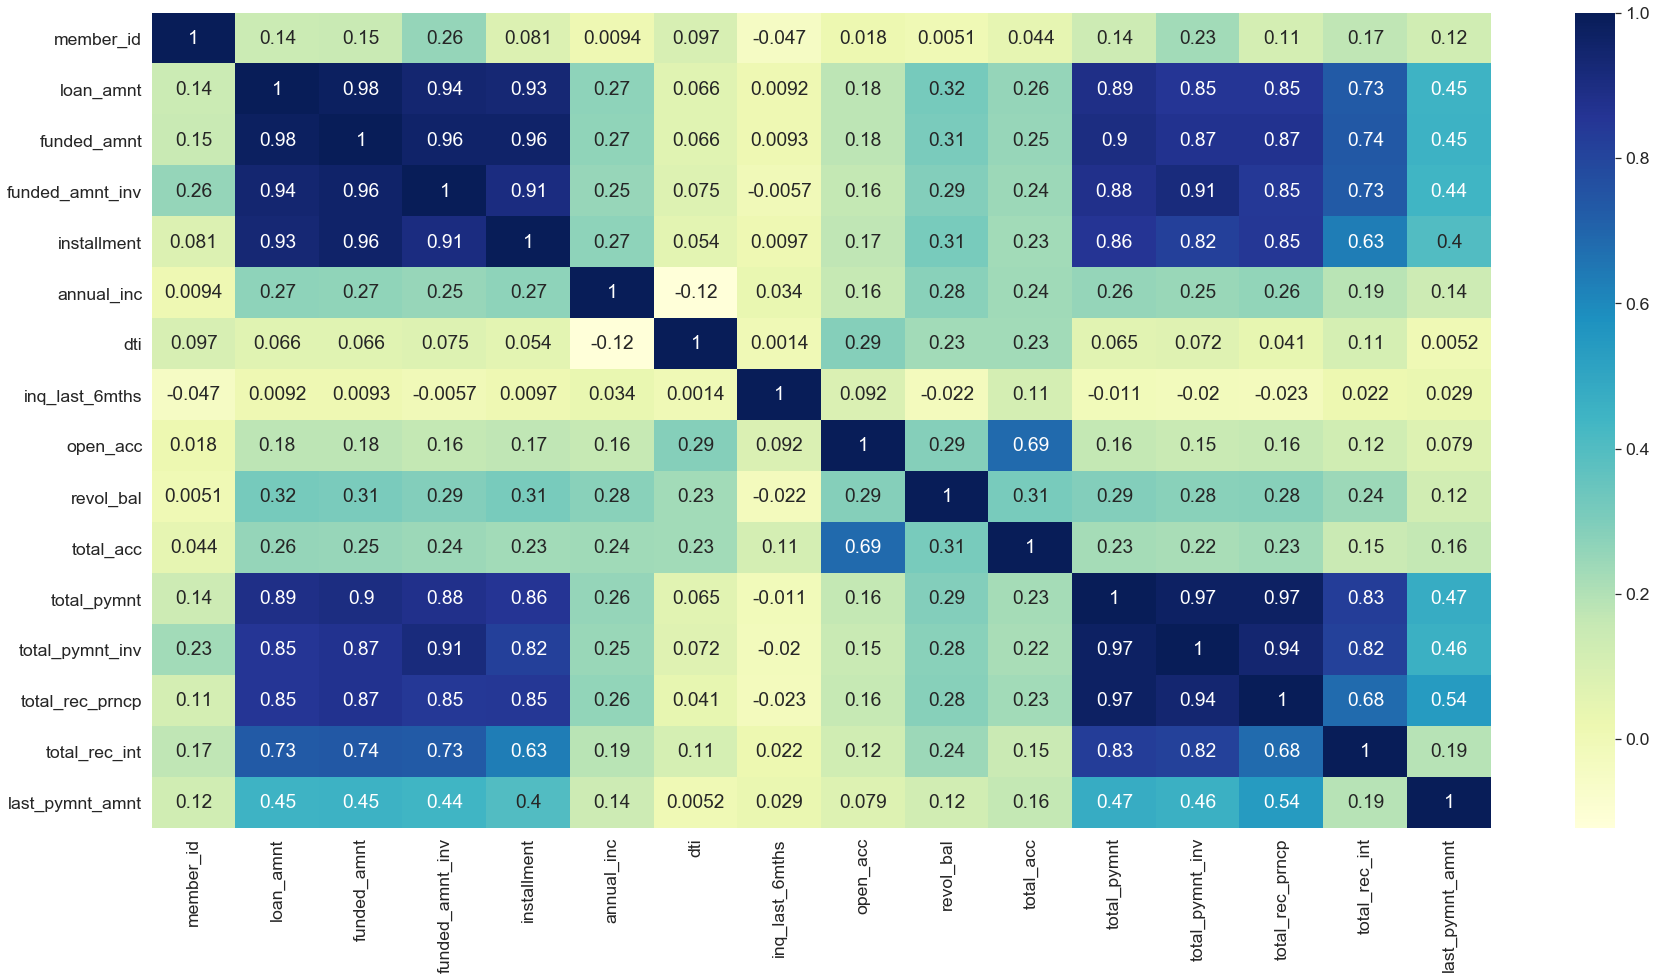

In [29]:
# Correlation heatmap
loans.corr('spearman')
plt.figure(figsize=(30, 15)) #Plot size
sns.set(font_scale=1.6) #Scale font size
sns.heatmap(loans.corr(),cmap="YlGnBu",annot=True) 

Let's examine the below columns:
* member_id
* url
* zip_code
* sub_grade
* total_pymnt_inv
* funded_amnt_inv
* installment
* total_rec_int
* total_rec_prncp
* last_pymnt_amnt
* revol_bal

We can clearly see that these columns are not useful for Data Analysis due to the below resons:
* __member_id__ - We already have a unique identifier(id) and it's not needed
* __url__ - It will not be used for any analysis, as they are url's of company's own domain
* __zip_code__ - the first 3 digits only provide the US State which is already available as a column, which makes this column   useless for analysis.
* __sub-grade__ - Lending Club assigns a unique interest rate corresponding to each sub-grade. The int_rate  is available in another column and as a numerical variable it's more useful for analysis.
* __total_pymnt_inv__, __funded_amnt_inv__ -  These are subsets of total_pymnt and funded_amt. For analysis on impact on loan defaulting, it is irrelevant whether the funds were provided by investor or not therefore these are redundant for analysis.
* __installment__ - This is the result of 3 existing columns - loan amount, term and interest rate  which makes this column redundant
* __total_rec_int__, __total_rec_prncp__, __last_pymnt_amnt__ - These columns provide information at the time of exporting this data and this may have changed afterwards so it can not be used for analyzing factors for loan defaulting. We can used funded_amnt instead for analysis
* __revol_util__ - This is highly correlated with revol_bal. Between the two, revol_util is a more useful variable for analysis as it provides credit utilization behavior of applicant as opposed to simply how much balance is remaining in the credit accounts 
* __total_acc__ - This is highly correlated to open_acc. It's best to created a derived metric which we will do later, so not deleting this now.

In [30]:
loans.drop(['member_id','url','zip_code', 'sub_grade','total_pymnt_inv','funded_amnt_inv','installment','total_rec_int','total_rec_prncp','revol_bal','last_pymnt_amnt'], axis=1,inplace=True)

In [31]:
loans.shape

(39717, 24)

> **Observation:** The dataframe is now of size (39717,24)

<a id="2.2.8"></a>
#### 2.2.8 Dealing with Missing Values


First let's find rows having more than Null Values.

In [32]:
#Any rows with greater than 5 null values?
loans[loans.isnull().sum(axis=1)>5]

Empty DataFrame
Columns: [loan_amnt, funded_amnt, term, int_rate, grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, addr_state, dti, earliest_cr_line, inq_last_6mths, open_acc, revol_util, total_acc, total_pymnt, last_pymnt_d, last_credit_pull_d]
Index: []

>**Observation:** There are no such rows.

Now, let's find look at the total missing values in each column:

In [33]:
loans.isnull().sum()

loan_amnt                 0
funded_amnt               0
term                      0
int_rate                  0
grade                     0
emp_title              2459
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                    11
addr_state                0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
revol_util               50
total_acc                 0
total_pymnt               0
last_pymnt_d             71
last_credit_pull_d        2
dtype: int64

We notice that below columns have missing values:
* emp_title                      2459
* emp_length                     1075
* title                            11
* revol_util                       50
* last_pymnt_d                     71
* last_credit_pull_d                2

Let's Deal with String Columns:

In [34]:
#loans[loans['emp_title'].isnull()] #2459 vals
loans[loans['emp_length'].isnull()] # 1075 vals
#loans[loans['title'].isnull()] # 11 vals

loan_amnt  funded_amnt       term int_rate grade  \
loan_id                                                     
1067644       2500         2500  36 months    7.51%     a   
1058717      18000        18000  60 months   17.58%     d   
1064582       4000         4000  36 months   11.71%     b   
1064366       1000         1000  36 months   14.65%     c   
1063912       8250         8250  36 months    7.51%     a   
1062897       1700         1700  36 months    7.90%     a   
1062781       5000         5000  36 months    8.90%     a   
1062535       3000         3000  36 months    9.91%     b   
1036838       8575         8575  36 months   17.58%     d   
1061194       5600         5600  36 months    6.03%     a   
1060848       6500         6500  60 months   14.27%     c   
1060485      14125        14125  36 months   12.42%     b   
1059128       7000         7000  60 months    8.90%     a   
1056011       2250         2250  36 months   15.27%     c   
1051228       6000         6000  60 months    7.90%     a   
1018385       7000         7000  36 months    6.62%     a   
1057726      15000        15000  36 months   12.42%     b   
1057318      12000         9650  60 months    9.91%     b   
926180       12000        12000  36 months    6.03%     a   
1056081      15000        15000  36 months   17.27%     d   
1055716       8500         8500  36 months   15.96%     c   
1055566       5000         5000  36 months    7.51%     a   
1055300       4000         4000  36 months   15.27%     c   
1055222       5000         5000  36 months   14.65%     c   
1054702      20400        20400  60 months   11.71%     b   
1053966       5000         5000  36 months    7.90%     a   
1053445       1400         1400  36 months    8.90%     a   
1053257       9250         9250  36 months   10.65%     b   
1052258       7200         7200  36 months   12.69%     b   
1052485       5325         5325  36 months   12.42%     b   
...            ...          ...        ...      ...   ...   
490402       18000        18000  36 months   16.82%     e   
490109        4750         4750  36 months   12.73%     c   
489758        6000         6000  36 months    7.88%     a   
489666        6000         6000  36 months    9.88%     b   
488844        2500         2500  36 months   10.62%     b   
481938        4750         4750  36 months    7.14%     a   
488230        4000         4000  36 months   10.62%     b   
488125        4800         4800  36 months    6.76%     a   
486440        4000         4000  36 months   10.62%     b   
486305       21000        21000  36 months   10.62%     b   
485624       15000        15000  36 months   10.99%     b   
485283       12000        12000  36 months    7.51%     a   
485205        3000         3000  36 months   10.62%     b   
468960        2500         2500  36 months    7.51%     a   
484222        8000         8000  36 months   15.70%     d   
484212       10000        10000  36 months   10.25%     b   
483317        5000         5000  36 months   13.48%     c   
482728        7000         7000  36 months    7.51%     a   
482719        9000         9000  36 months    7.88%     a   
480995        9800         9800  36 months   13.11%     c   
482590        4000         4000  36 months   17.19%     e   
482297        9500         9500  36 months   14.59%     d   
480999       10000        10000  36 months   13.85%     c   
472179       15000        15000  36 months    9.88%     b   
480843        1000         1000  36 months   10.25%     b   
480410       10000        10000  36 months   14.22%     c   
480216        3700         3700  36 months   14.22%     c   
479954       10000        10000  36 months   14.22%     c   
479836        6000         6000  36 months   12.73%     c   
479468       25000        25000  36 months   10.25%     b   

                     emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                
1067644              

These columns contains text data and we dont have an other source to fill the missing values. So'lets substitute - `Unknown`

In [35]:
loans['emp_title'].fillna('Unknown',inplace=True)
loans['emp_length'].fillna('Unknown',inplace=True)
loans['title'].fillna('Unknown',inplace=True)

Now, let's look at the Date Type columns

In [36]:
loans[loans['last_pymnt_d'].isnull()] # 71 vals

loan_amnt  funded_amnt       term int_rate grade  \
loan_id                                                     
1069800      15000        15000  36 months   14.27%     c   
1032519       8000         8000  36 months   14.65%     c   
1016039       6400         6400  60 months   18.25%     d   
1009833      18000        18000  60 months   19.03%     e   
1006579       1800         1800  36 months    8.90%     a   
996977        1500         1500  36 months   16.29%     d   
980312        2000         2000  36 months    7.51%     a   
971529        1400         1400  36 months    8.90%     a   
971449       30000        30000  60 months   19.03%     e   
892468        4000         4000  60 months   19.03%     e   
890159        4800         4800  36 months   14.27%     c   
889684        2200         2200  60 months   19.42%     e   
886664       10400        10400  60 months   17.58%     d   
859957       13500        13500  60 months   18.39%     e   
859150       35000        35000  60 months   13.99%     c   
836872        4600         4600  36 months   13.99%     c   
821564       22600        22600  60 months   22.11%     g   
813908        1500         1500  36 months    8.49%     a   
812628        8450         8450  60 months   13.49%     c   
809611        3000         3000  36 months   15.62%     d   
807187        9600         9600  36 months   13.49%     c   
804512        5000         5000  36 months   12.99%     c   
792555        6000         6000  36 months   11.49%     b   
777801        9600         9600  36 months    5.99%     a   
772732        2000         2000  36 months   18.39%     e   
772782       12325        12325  60 months   11.49%     b   
768963        3450         3450  36 months   11.99%     b   
762630        5000         5000  36 months   16.49%     d   
759372        1000         1000  36 months   13.43%     c   
758813        5000         5000  36 months   13.99%     c   
...            ...          ...        ...      ...   ...   
593837        1000         1000  36 months   16.32%     d   
563684        2400         2400  36 months   13.98%     c   
550066        2000         2000  36 months   11.49%     b   
542658        3500         3500  36 months   14.72%     c   
535687        4000         4000  60 months   10.75%     b   
534313        7000         7000  60 months   18.67%     f   
529224        4750         4750  36 months   14.72%     c   
520008        3600         3600  60 months   15.70%     d   
510546       20000        20000  36 months   13.85%     c   
498235        1000         1000  36 months   14.96%     d   
496276       20000        20000  36 months   10.25%     b   
483343        4000         4000  36 months   15.33%     d   
483079       10000        10000  36 months   13.85%     c   
480843        1000         1000  36 months   10.25%     b   
480401       10000        10000  36 months   13.85%     c   
478160        7750         7750  36 months   17.04%     e   
474333        1800         1800  36 months   12.18%     b   
466079        4900         4900  36 months   13.22%     c   
455671        8000         8000  36 months   14.96%     d   
454980       12000        12000  36 months   11.14%     b   
454682        6000         6000  36 months   14.61%     d   
451820        4000         4000  36 months   12.87%     c   
450384       25000        25000  36 months   12.87%     c   
440371       20000        20000  36 months   15.65%     d   
439641       20000        20000  36 months   17.39%     e   
419505       20000        20000  36 months   11.89%     b   
417817        7800         7800  36 months   10.95%     b   
418546        2000         2000  36 months   16.00%     e   
392751       25000        25000  36 months   13.79%     c   
369400        5000         5000  36 months   18.21%     f   

                                                 emp_title emp_length  \
loan_id                                                                 
1069800            

> **Note:** Since these missing values are of defaulter's and we are unaware of their last payment, we cannot analyse these records. So let's remove the 71 records.

In [37]:
loans = loans.dropna(subset=['last_pymnt_d'])

In [38]:
loans[loans['last_credit_pull_d'].isnull()] # 71 vals
loans = loans.dropna(subset=['last_credit_pull_d'])

Since, we cannot add a Random Date to these values, it's best to remove these values from the analyis.<br>

Now, let's examine the Numeric Type Columns

In [39]:
loans[loans['revol_util'].isnull()] # 46 vals

loan_amnt  funded_amnt       term int_rate grade  \
loan_id                                                     
1016416       8000         8000  36 months   19.42%     e   
997734        6100         6100  36 months   14.27%     c   
790093        7200         7200  36 months   14.27%     c   
817195        5000         5000  36 months   21.36%     f   
804073        3000         3000  60 months   22.11%     g   
802201        4275         4275  36 months   15.99%     d   
706991       20000        20000  60 months   20.48%     g   
702880        1825         1825  36 months   12.68%     c   
641703        2500         2500  36 months   16.69%     e   
597450        1000         1000  36 months   14.84%     d   
596426        3000         3000  36 months   16.32%     d   
592219        2400         2400  36 months   14.72%     c   
587749        8000         8000  36 months   15.58%     d   
576386        3200         3200  36 months   17.93%     e   
565967        1800         1800  36 months   14.84%     d   
564565        3000         3000  36 months   13.98%     c   
562958        2100         2100  36 months   15.21%     d   
542443        4800         4800  36 months   17.93%     e   
529742        2000         2000  36 months   15.58%     d   
529189        3000         3000  36 months   14.35%     c   
524545        1500         1500  36 months   16.82%     e   
524778        1800         1800  36 months   15.21%     d   
489925        2500         2500  36 months   18.30%     f   
485585        5500         5500  36 months   17.93%     e   
478050       15000        15000  36 months   14.61%     d   
472809        5000         5000  36 months   15.31%     d   
467846        2500         2500  36 months   15.31%     d   
466869        5000         5000  36 months   14.61%     d   
454140        1200         1200  36 months   14.26%     c   
445339        5500         5500  36 months   19.13%     f   
428880        1400         1400  36 months   12.84%     c   
409181        1750         1750  36 months   15.05%     d   
385106        6500         6500  36 months   14.11%     d   
389118       10000        10000  36 months   15.05%     d   
385010        1400         1400  36 months   15.37%     d   
377376        5000         5000  36 months   16.95%     e   
367694        2750         2750  36 months   16.95%     e   
373213       12000        12000  36 months   13.16%     c   
371408        5000         5000  36 months   13.79%     c   
362592        9000         9000  36 months   15.57%     e   
353677        7500         7500  36 months   16.33%     f   
352047        5600         5600  36 months   10.64%     b   
306018         700          700  36 months   12.29%     c   
300383        8000         8000  36 months   11.34%     c   
294803        1600         1600  36 months   11.03%     c   
290803        3000         3000  36 months   11.34%     c   

                                               emp_title emp_length  \
loan_id                                                               
1016416                           medline industries inc    3 years   
997734                                           Unknown    Unknown   
790093                                         cal-trans    7 years   
817195                                           Unknown    Unknown   
804073                                     abbeycare inc    6 years   
802201                      global textiles alliance,inc    7 years   
706991                              sherwin-williams co.  10+ years   
702880                                           Unknown   < 1 year   
641703                                    self- employed    7 years   
597450                                 aurora multimedia   < 1 year   
596426                       zeigler ranalli development    4 years   
592219                                           Unknown    Unknown   
587749                                            amtrak     1 year   
576386         

In [40]:
loans['revol_util'].nunique()

1089

In [41]:
loans = loans.dropna(subset=['revol_util'])

In [42]:
loans.isnull().sum()

loan_amnt              0
funded_amnt            0
term                   0
int_rate               0
grade                  0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
revol_util             0
total_acc              0
total_pymnt            0
last_pymnt_d           0
last_credit_pull_d     0
dtype: int64

In [43]:
loans.shape

(39598, 24)

> **Observation:** We have now removed all the missing values from the dataset and it now contains 39598 rows and 24 columns.

<a id="2.2.9"></a>
### 2.2.9 Change Data Types


Let's first look at the current DataTypes

In [44]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 1077501 to 87023
Data columns (total 24 columns):
loan_amnt              39598 non-null int64
funded_amnt            39598 non-null int64
term                   39598 non-null object
int_rate               39598 non-null object
grade                  39598 non-null object
emp_title              39598 non-null object
emp_length             39598 non-null object
home_ownership         39598 non-null object
annual_inc             39598 non-null float64
verification_status    39598 non-null object
issue_d                39598 non-null object
loan_status            39598 non-null object
purpose                39598 non-null object
title                  39598 non-null object
addr_state             39598 non-null object
dti                    39598 non-null float64
earliest_cr_line       39598 non-null object
inq_last_6mths         39598 non-null int64
open_acc               39598 non-null int64
revol_util             39598 non

<a id="2.2.9.1"></a>
#### 2.2.9.1 Dealing with Date Data Types


We notice that Columns - **issue_d**,__earliest_cr_line__ ,__last_pymnt_d__ , **last_credit_pull_d** are of Type Onject. Let's convert these to Date Time Onject.

Since the columns are in MMM-YY format and has no Date data, let's assume date to be 1st day of the month.

In [45]:
# Change the Data Type to datetime-64
loans['earliest_cr_line']= pd.to_datetime(loans['earliest_cr_line'], format='%b-%y')
loans['issue_d']=pd.to_datetime(loans['issue_d'], format='%b-%y')
loans['last_pymnt_d']= pd.to_datetime(loans['last_pymnt_d'], format='%b-%y')
loans['last_credit_pull_d']= pd.to_datetime(loans['last_credit_pull_d'], format='%b-%y')

Now, let's examine columns which has very less unique values

In [46]:
loans.select_dtypes(include=['object']).nunique()

term                       2
int_rate                 371
grade                      7
emp_title              27126
emp_length                12
home_ownership             5
verification_status        3
loan_status                3
purpose                   14
title                  17375
addr_state                50
revol_util              1089
dtype: int64

<a id="2.2.9.2"></a>
#### 2.2.9.2 Dealing with Continuous (Numerical) Data Types


In [47]:
loans.select_dtypes(include=['object','int64']).head(2)

loan_amnt  funded_amnt       term int_rate grade emp_title  \
loan_id                                                               
1077501       5000         5000  36 months   10.65%     b   Unknown   
1077430       2500         2500  60 months   15.27%     c     ryder   

        emp_length home_ownership verification_status  loan_status  \
loan_id                                                              
1077501  10+ years           rent            verified   fully paid   
1077430   < 1 year           rent     source verified  charged off   

             purpose     title addr_state  inq_last_6mths  open_acc  \
loan_id                                                               
1077501  credit_card  computer         az               1         3   
1077430          car      bike         ga               5         3   

        revol_util  total_acc  
loan_id                        
1077501     83.70%          9  
1077430      9.40%          4

The below columns are continuous and must be converted to type Float:
* loan_amnt
* funded_amnt
* int_rate
* revol_util

For `int_rate` and `revol_util` let's remove % and then convert

In [48]:
# Remove % at the end
loans['int_rate'] = loans['int_rate'].apply(lambda s:float(s.strip("%")))
loans['revol_util'] = loans['revol_util'].apply(lambda s:float(str(s).strip("%")))

In [49]:
loans['loan_amnt']= loans['loan_amnt'].astype('float')
loans['funded_amnt']=loans['funded_amnt'].astype('float')

In [50]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 1077501 to 87023
Data columns (total 24 columns):
loan_amnt              39598 non-null float64
funded_amnt            39598 non-null float64
term                   39598 non-null object
int_rate               39598 non-null float64
grade                  39598 non-null object
emp_title              39598 non-null object
emp_length             39598 non-null object
home_ownership         39598 non-null object
annual_inc             39598 non-null float64
verification_status    39598 non-null object
issue_d                39598 non-null datetime64[ns]
loan_status            39598 non-null object
purpose                39598 non-null object
title                  39598 non-null object
addr_state             39598 non-null object
dti                    39598 non-null float64
earliest_cr_line       39598 non-null datetime64[ns]
inq_last_6mths         39598 non-null int64
open_acc               39598 non-null int64
revol_util 

> **Observation**: We now see that our DataFrame is of size 7.6 MB

<a id="2.2.10"></a>
### 2.2.10 Remove current loans


As we will be analyzing data for the purpose of identifying loans that default vs those that get paid off, the loans that have no concluded i.e. current loans should be removed

In [51]:
#Exclude loans that are not concluded as fully paid or charged off. 
loans = loans[(loans.loan_status=='fully paid') | (loans.loan_status=='charged off')]

Now, the Data is cleaned. We will now add Derived Metrics before performing analysis.

In [52]:
loans.sample(5)

loan_amnt  funded_amnt       term  int_rate grade  \
loan_id                                                      
703627   19,000.00    19,000.00  60 months     10.74     b   
622951   20,000.00    20,000.00  60 months     15.20     d   
697392    6,000.00     6,000.00  60 months     13.43     c   
1064558   9,800.00     9,800.00  36 months     16.29     d   
643511   15,000.00    15,000.00  36 months      9.99     b   

                      emp_title emp_length home_ownership  annual_inc  \
loan_id                                                                 
703627          billings clinic  10+ years       mortgage  110,004.00   
622951                     at&t  10+ years           rent   75,000.00   
697392                 sara lee  10+ years           rent   44,000.00   
1064558  gladding & michel inc.    4 years           rent   67,000.00   
643511       needhams companies    6 years       mortgage  102,000.00   

        verification_status    issue_d  loan_status             purpose  \
loan_id                                                                   
703627             verified 2011-03-01   fully paid  debt_consolidation   
622951             verified 2010-12-01   fully paid  debt_consolidation   
697392         not verified 2011-03-01   fully paid      major_purchase   
1064558        not verified 2011-12-01   fully paid         credit_card   
643511      source verified 2011-01-01  charged off  debt_consolidation   

                             title addr_state   dti earliest_cr_line  \
loan_id                                                                
703627          debt consolidation         mt 16.94       1994-02-01   
622951                    personal         ny 19.89       1994-07-01   
697392                      tacori         sd  5.24       2000-04-01   
1064558  credit card consolidation         ca 21.01       1992-05-01   
643511   credit card consolidation         pa 13.20       1995-11-01   

         inq_last_6mths  open_acc  revol_util  total_acc  total_pymnt  \
loan_id                                                                 
703627                3        11       24.80         30    23,453.03   
622951                0         3       95.40         24    26,356.93   
697392                2         3       49.70          5     8,270.39   
1064558               2        14       44.90         18    12,161.91   
643511                7        17       46.30         54    10,676.63   

        last_pymnt_d last_credit_pull_d  
loan_id                                  
703627    2014-02-01         2014-02-01  
622951    2013-07-01         2015-11-01  
697392    2016-03-01         2016-03-01  
1064558   2014-01-01         2016-05-01  
643511    2012-07-01         2012-10-01

<a id="3"></a>
## 3. Derived Metrics


In this section, we will Derive New columns from existing columns that will help us in Data Analysis.

<a id="3.1"></a>
### 3.1 Extract Year and Month from issue_d


In [53]:
loans['issue_year'] = pd.DatetimeIndex(loans['issue_d']).year
loans['issue_month'] = pd.DatetimeIndex(loans['issue_d']).month

<a id="3.2"></a>
### 3.2. Loan amount to Annual Income ratio


In [54]:
loans['loan_income_ratio']= loans['loan_amnt']/loans['annual_inc']

<a id="3.3"></a>
### 3.3.  Getting List of  States from addr_state


In [55]:
# Let's import the master file which contains state abbreviations and name
# The file is already clean contains matching column names and lower-case data, we can add it directly
us_state= pd.read_csv("https://github.com/insculptor/Exploratory-Data-Analysis/blob/master/Lending%20Club%20Case%20Study/us_state_master.csv?raw=true")
# Join with the file and add column to loan
loans = pd.merge(loans, us_state, on='addr_state', how='left')
# remove addr_state Column as it's not needed
loans.drop(['addr_state'], axis=1,inplace=True)

Now, Let's group some data points as Bins, as it will help us for further analysis.

<a id="3.4"></a>
### 3.4.  Creating Closed Lines of Credit column

As seen before, total_acc and open_acc are highly correlated because total credit lines (total_acc) = open (open_acc) + closed credit lines. So, let's create a separate column for closed_acc and delete total_acc as it becomes redundant

In [56]:
#create closed_acc column
loans['closed_acc'] = loans['total_acc']-loans['open_acc']

#delete total_acc as it is no longer needed
loans.drop(columns='total_acc',axis=1,inplace=True)

<a id="3.5"></a>
### 3.5.  Creating bins for Continuous Data


In [57]:
loans.sample(2)

loan_amnt  funded_amnt       term  int_rate grade  \
26414   6,000.00     6,000.00  60 months     16.82     e   
12328   7,950.00     7,950.00  36 months     10.99     b   

                                   emp_title emp_length home_ownership  \
26414                         community bank   < 1 year           rent   
12328  abrams,gorelick,friedman,and jacobson  10+ years           rent   

       annual_inc verification_status    issue_d loan_status  \
26414   16,320.00        not verified 2010-07-01  fully paid   
12328   50,700.00        not verified 2011-06-01  fully paid   

                  purpose                       title  dti earliest_cr_line  \
26414  debt_consolidation         credit card pay off 6.76       2002-08-01   
12328         credit_card  credit card refinance loan 7.55       1999-11-01   

       inq_last_6mths  open_acc  revol_util  total_pymnt last_pymnt_d  \
26414               0         8       51.60     8,883.43   2015-03-01   
12328               0        10       84.70     9,368.43   2014-07-01   

      last_credit_pull_d  issue_year  issue_month  loan_income_ratio  \
26414         2015-03-01        2010            7               0.37   
12328         2016-04-01        2011            6               0.16   

            us_state  closed_acc  
26414  west virginia           8  
12328       new york           1

Let's analyse the below few coninuous columns:

In [58]:
loans[['loan_amnt','int_rate','annual_inc']].describe()

loan_amnt  int_rate   annual_inc
count  38,458.00 38,458.00    38,458.00
mean   11,060.02     11.92    68,845.50
std     7,346.81      3.69    64,255.80
min       500.00      5.42     4,000.00
25%     5,375.00      8.94    40,000.00
50%     9,700.00     11.71    59,000.00
75%    15,000.00     14.35    82,000.00
max    35,000.00     24.40 6,000,000.00

In [59]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loans['loan_amnt_range'] = pd.cut(loans['loan_amnt'], bins, labels=slot)

In [60]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loans['int_rate_range'] = pd.cut(loans['int_rate'], bins, labels=slot)

In [61]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loans['annual_inc_range'] = pd.cut(loans['annual_inc'], bins, labels=slot)

In [62]:
loans.sample(3)

loan_amnt  funded_amnt       term  int_rate grade emp_title emp_length  \
18229   4,600.00     4,600.00  60 months     18.25     f   Unknown    Unknown   
31155  12,000.00    12,000.00  36 months     14.96     d   Unknown    2 years   
10702  12,000.00    12,000.00  60 months     16.89     d      pg&e    7 years   

      home_ownership  annual_inc verification_status    issue_d  loan_status  \
18229           rent   36,636.00            verified 2011-02-01  charged off   
31155           rent   34,000.00        not verified 2010-02-01   fully paid   
10702       mortgage  107,000.00        not verified 2011-07-01   fully paid   

                  purpose                title   dti earliest_cr_line  \
18229  debt_consolidation          stuffing it 23.71       2005-10-01   
31155         credit_card  bk credit card refi  9.78       1997-03-01   
10702  debt_consolidation        consolidation  8.13       1997-02-01   

       inq_last_6mths  open_acc  revol_util  total_pymnt last_pymnt_d  \
18229               3         4       99.00     1,013.12   2011-10-01   
31155               0         5       95.50    14,547.51   2012-02-01   
10702               1         6       90.30    13,452.74   2012-04-01   

      last_credit_pull_d  issue_year  issue_month  loan_income_ratio  \
18229         2012-03-01        2011            2               0.13   
31155         2012-03-01        2010            2               0.35   
10702         2016-05-01        2011            7               0.11   

         us_state  closed_acc loan_amnt_range int_rate_range  annual_inc_range  
18229  california          10          0-5000   15 and above       25000-50000  
31155     florida           8     10000-15000        12.5-15       25000-50000  
10702  california          24     10000-15000   15 and above  100000 and above

In [63]:
loans.shape

(38458, 30)

> **Obeservation** : We now have a clean dataset with 37 columns and 38458 rows for analysis.

<a id="3.6"></a>
### 3.6. Create charged_off  Column

Let's create a target column that indicates whether a loan is charged off/(1) or not (0). This will be used for bivariate analysis.

In [64]:
#Create charged_off column from loan_status
loans['charged_off'] = loans['loan_status'].apply(lambda s:1 if s=='charged off' else 0)

In [65]:
#Percentage of loans that are charged off/defaulted
(loans['charged_off'].sum()/loans['loan_status'].count())*100

14.4131260075927

>**Obervation**: Only 14% of all concluded loans are charged off, the remaining are fully paid.

<a id="3.7"></a>
### 3.7. Create active_pymnt_days Column

Let's get the number of days between the loan issue date ('issue_d') and the last payment date ('last_pymnt_d')

In [66]:
loans['active_pymnt_days'] = loans['last_pymnt_d'] - loans['issue_d']
loans['active_pymnt_days'] = loans['active_pymnt_days'].apply(lambda s:s.days)
loans['active_pymnt_days'].head(2)

0    1127
1     487
Name: active_pymnt_days, dtype: int64

In [67]:
loans.sample(2)

loan_amnt  funded_amnt       term  int_rate grade  \
33444  10,000.00    10,000.00  36 months     13.22     c   
35269  15,000.00    15,000.00  36 months     13.47     c   

                      emp_title emp_length home_ownership  annual_inc  \
33444          asian art museum    3 years           rent   35,000.00   
35269  exhibit group - giltspur     1 year            own   71,004.00   

      verification_status    issue_d loan_status             purpose  \
33444        not verified 2009-10-01  fully paid  debt_consolidation   
35269        not verified 2009-06-01  fully paid    home_improvement   

                    title   dti earliest_cr_line  inq_last_6mths  open_acc  \
33444  debt consolidation  8.09       2004-09-01               0         7   
35269                home 18.84       1987-09-01               0        11   

       revol_util  total_pymnt last_pymnt_d last_credit_pull_d  issue_year  \
33444       61.90    12,123.14   2012-10-01         2012-10-01        2009   
35269       61.00    18,318.17   2012-06-01         2016-02-01        2009   

       issue_month  loan_income_ratio       us_state  closed_acc  \
33444           10               0.29     california           0   
35269            6               0.21  massachusetts          16   

      loan_amnt_range int_rate_range annual_inc_range  charged_off  \
33444      5000-10000        12.5-15      25000-50000            0   
35269     10000-15000        12.5-15      50000-75000            0   

       active_pymnt_days  
33444               1096  
35269               1096

<a id="3.8"></a>
### 3.8. Income Category

Based on employees income we will put him in an income group:
* __Low__- income <= 10000 USD
* __Mid__ - 10000USD <income <= 20000USD
* __High__ - income >  20000USD

In [68]:
loans['income_category'] = np.nan
lst = [loans]

for loan in lst:
    loans.loc[loans['annual_inc'] <= 100000, 'income_category'] = 'Low'
    loans.loc[(loans['annual_inc'] > 100000) & (loans['annual_inc'] <= 200000), 'income_category'] = 'Medium'
    loans.loc[loans['annual_inc'] > 200000, 'income_category'] = 'High'

In [69]:
loans.shape

(38458, 33)

>**Note:** Now we have 33 variables and 38,458 applications for analysis.

<a id="4"></a>
### 4. Data Analysis

In this section, we create an approach for data Analysis, by classing them into different categories.__(buckets)__
For each category, we will then perform univariate, and bivariate analysis.

The Data types can be categorised as:

* Categorical
  * Unordered
  * Ordered
* Quantitative
  * Continuous
  * Discrete

<a id='4.1'></a>
### 4.1 Identify Key Variables for Analysis

Let's identify the __Categorical__ and __Quantitative__ data types:

In [70]:
# Finding numerical variables
numeric_data = loans.select_dtypes(include = [np.number])

# Finding categorical variables
categorical_data = loans.select_dtypes(exclude = [np.number])

#Print number ofnumerical and categorical features
print('There are {0} numerical and {1} categorical features in the loan data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 15 numerical and 18 categorical features in the loan data


Before we categorise the variables, since we need to Analyses the charged off loans, it will be good to look at numerical variables correlation with charged off metric.

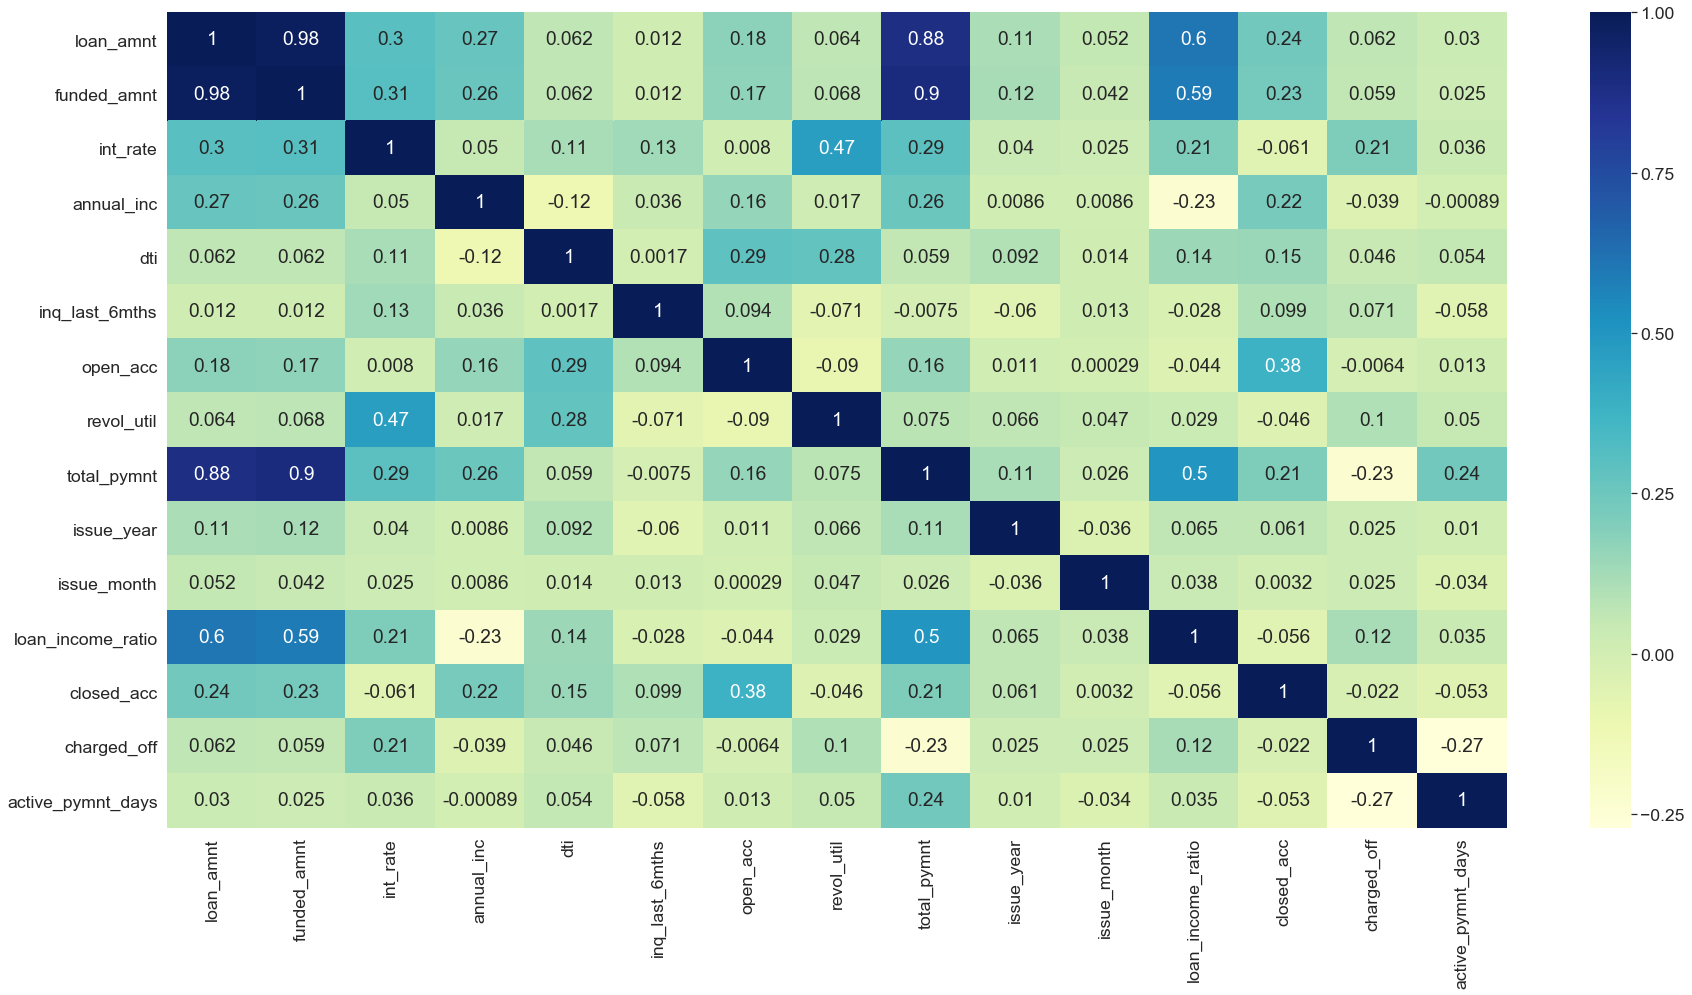

In [71]:
#Correlation after adding charged_off column
loans.corr('spearman')
plt.figure(figsize=(30, 15)) #Plot size
sns.set(font_scale=1.6) #Scale font size
sns.heatmap(loans.corr(),cmap="YlGnBu",annot=True) 

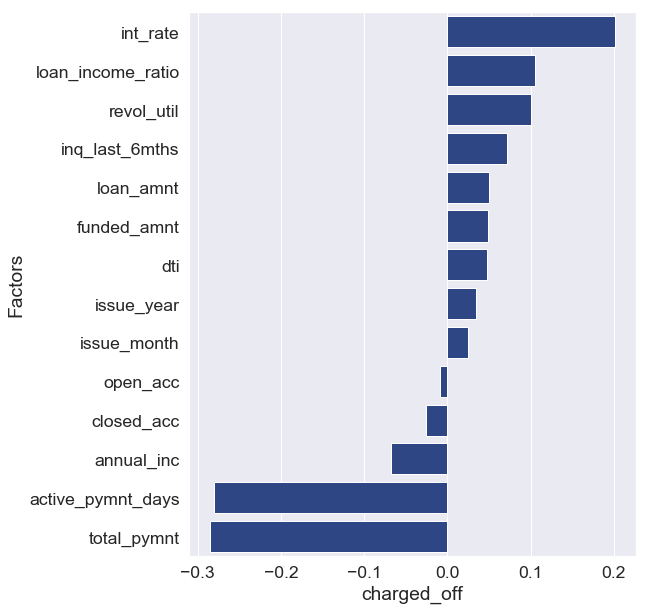

In [72]:
# Feature sorted by correlation to charged_off, from positive to negative
corr = loans.corr('spearman').sort_values('charged_off', ascending=False)
clrs = ["#707070" if (x <= 0.5) else "#214093" for x in corr.sum(axis=1)]
plt.figure(figsize=(8,10))
plt.xlabel('Charged off')
plt.ylabel('Factors')
sns.barplot(corr.charged_off[1:], corr.index[1:], orient='h',palette=clrs) #barplot of correlation of variables with respect to charged_off
plt.show()

In [73]:
loans.head(1)

loan_amnt  funded_amnt       term  int_rate grade emp_title emp_length  \
0   5,000.00     5,000.00  36 months     10.65     b   Unknown  10+ years   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0           rent   24,000.00            verified 2011-12-01  fully paid   

       purpose     title   dti earliest_cr_line  inq_last_6mths  open_acc  \
0  credit_card  computer 27.65       1985-01-01               1         3   

   revol_util  total_pymnt last_pymnt_d last_credit_pull_d  issue_year  \
0       83.70     5,863.16   2015-01-01         2016-05-01        2011   

   issue_month  loan_income_ratio us_state  closed_acc loan_amnt_range  \
0           12               0.21  arizona           6          0-5000   

  int_rate_range annual_inc_range  charged_off  active_pymnt_days  \
0        10-12.5          0-25000            0               1127   

  income_category  
0             Low

<a id='4.2'></a>
### 4.2 Analysis Approach

Based on domain knowledge and above correlation analysis, we will now analyze key attributes in the following categories including determining their influence on Charge_off:

* __Attributes of the debtor/consumer__ (Bucket 01)
  * home_ownership
  * verification_status
  * annual_inc 
  * dti
  * revol_util
  * open_acc
  * inq_last_6mths
  * last_credit_pull_d
  * earliest_cr_line
  * us_state
  
* __Attributes of the loan requested__ (Bucket 02)
  * title
  * loan_amnt
  * term
  * purpose

* __Attributes of Loan offered and status after approval__ (Bucket 03)
   * active_pymnt_days
   * funded_amnt 
   * int_rate
   * grade

In [74]:
#Create a list of all related attributes

#attributes of the debtor (loan applicant)
consumer_attr = ['home_ownership','verification_status','annual_inc', 'dti','revol_util', 'open_acc', 'inq_last_6mths', 'last_credit_pull_d', 'earliest_cr_line', 'us_state']


#attributes of the loan requested by loan applicant
credit_attr = ['title','loan_amnt','term','purpose']


#attribute of Loan offered and status after approval
loan_given_attr = ['active_pymnt_days', 'funded_amnt','int_rate', 'grade'] 

print("So we have a total of ", len(consumer_attr) + len(credit_attr) + len(loan_given_attr), " variables to analyze")

So we have a total of  18  variables to analyze


<a id='4.3'></a>
### 4.3 Consumer's Attributes Analysis

Attributes of the loan application (a.k.a consumer/debtor) to be analyzed are:
- Home ownerships
- Verification Status
- Revolving Utilization (revol_util)
- Open & Closed Credit Lines (open_acc, closed_acc)
- Credit Inquiries in the last 6 months (inq_last_6mnths)
- Annual Income (annual_inc) & Debt to Income (dti)
- First line of credit date (earliest_cr_line)
- Last credit inquiry pulled date (last_credit_pull_d)
- State address (us_state)

In [75]:
loans[consumer_attr].sample(2)

home_ownership verification_status  annual_inc   dti  revol_util  \
5822       mortgage     source verified   60,000.00 19.74       70.00   
9118       mortgage        not verified   75,000.00  5.07        0.10   

      open_acc  inq_last_6mths last_credit_pull_d earliest_cr_line    us_state  
5822         7               0         2016-05-01       1996-05-01     georgia  
9118         5               3         2014-09-01       2004-09-01  new jersey

Now, Let's analyse these variables on basis of their Data Types:

* Categorical Variables:
    * Unoredred Categorical Variables:
        * home_ownership
        * us_state
    * Ordered Categorical Variables:
        * verification_status
*  Quantitative Variables
    * Discrete 
        * open_acc
        * inq_last_6mnths
    * Continuous Variables
        * annual_inc
        * dti
        * revol_util

#### 4.3.1 Home ownership analysis
<a id='4.3.1'></a>

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [76]:
#Possible home ownership values?
loans['home_ownership'].unique()

array(['rent', 'own', 'mortgage', 'other', 'none'], dtype=object)

##### 4.3.1.1 Home_ownership Univariate Analysis
<a id='4.3.1.1'></a>

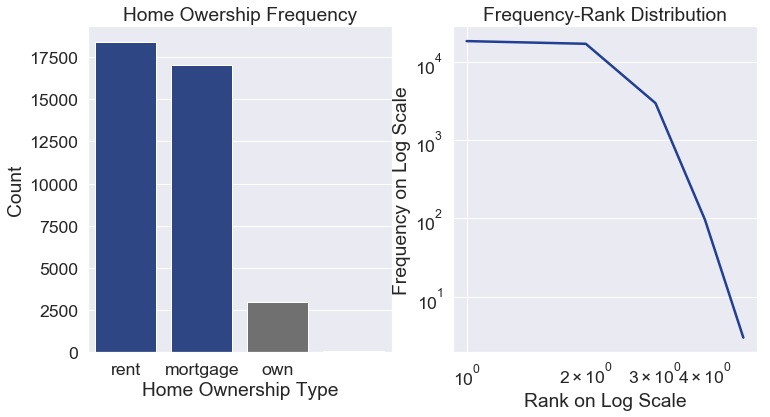

In [77]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
clrs = ["#707070" if (x < 5000) else "#214093" for x in loans['home_ownership'].value_counts() ]
p = sns.countplot(data=loans, x = 'home_ownership',palette=clrs,order=['rent','mortgage','own','other'])
p.set(ylabel='Count', xlabel='Home Ownership Type',title='Home Owership Frequency'
          ,xticklabels=['rent','mortgage','own'])
plt.subplot(122)
ax = sns.lineplot(x=loans['home_ownership'].value_counts().rank(ascending=False), 
                  y=loans['home_ownership'].value_counts(), data=loans,
                  palette="muted",linewidth=2.5, color="#214093",markers=True)
ax.set(ylabel='Frequency on Log Scale', xlabel='Rank on Log Scale',title='Frequency-Rank Distribution')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

>**Observation**: From the above plots we can infer that Rent and Morgage is the most common type of house_ownership. Also, very few house owners apply for loan.

##### 4.3.1.2 Home_ownership Segmented Univariate Analysis
<a id='4.3.1.2'></a>

### Note: In Segmeted Univariate Analysis, we will segment the data on the basis of loan_status (fully paid vs charged off)
 
This will help us to give a better picture of charged off loans.

Now let's analyse do segmented univariate analysis on home_ownership


[Text(0, 0.5, 'Count'),
 [Text(0, 0, 'rent'), Text(0, 0, 'mortgage'), Text(0, 0, 'own')],
 Text(0.5, 0, 'Home Ownership Type'),
 Text(0.5, 1.0, 'Home Owership Frequency')]

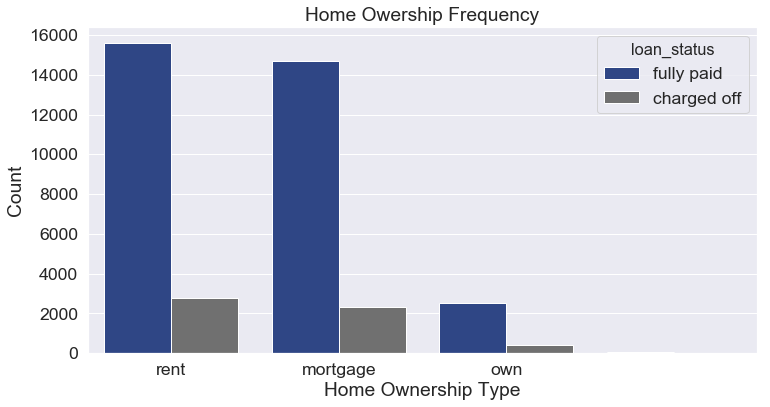

In [78]:
plt.figure(figsize=(12, 6))
clrs = ["#707070" if (x != 'fully paid') else "#214093" for x in loans['loan_status'].value_counts().index ]
p = sns.countplot(data=loans, x = 'home_ownership',palette=clrs,order=['rent','mortgage','own','other'],hue='loan_status')
p.set(ylabel='Count', xlabel='Home Ownership Type',title='Home Owership Frequency'
          ,xticklabels=['rent','mortgage','own'])

> **Observation:** 
- We see that though the most loans are having house_ownership as `rent`, the charged off loans are have `other` as a house_ownership.
- There appears to be no significant influence of home ownership on charge off

#### 4.3.2 us_state analysis
<a id='4.3.2'></a>

States from where most applications were filed

**Univariate Analysis:**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



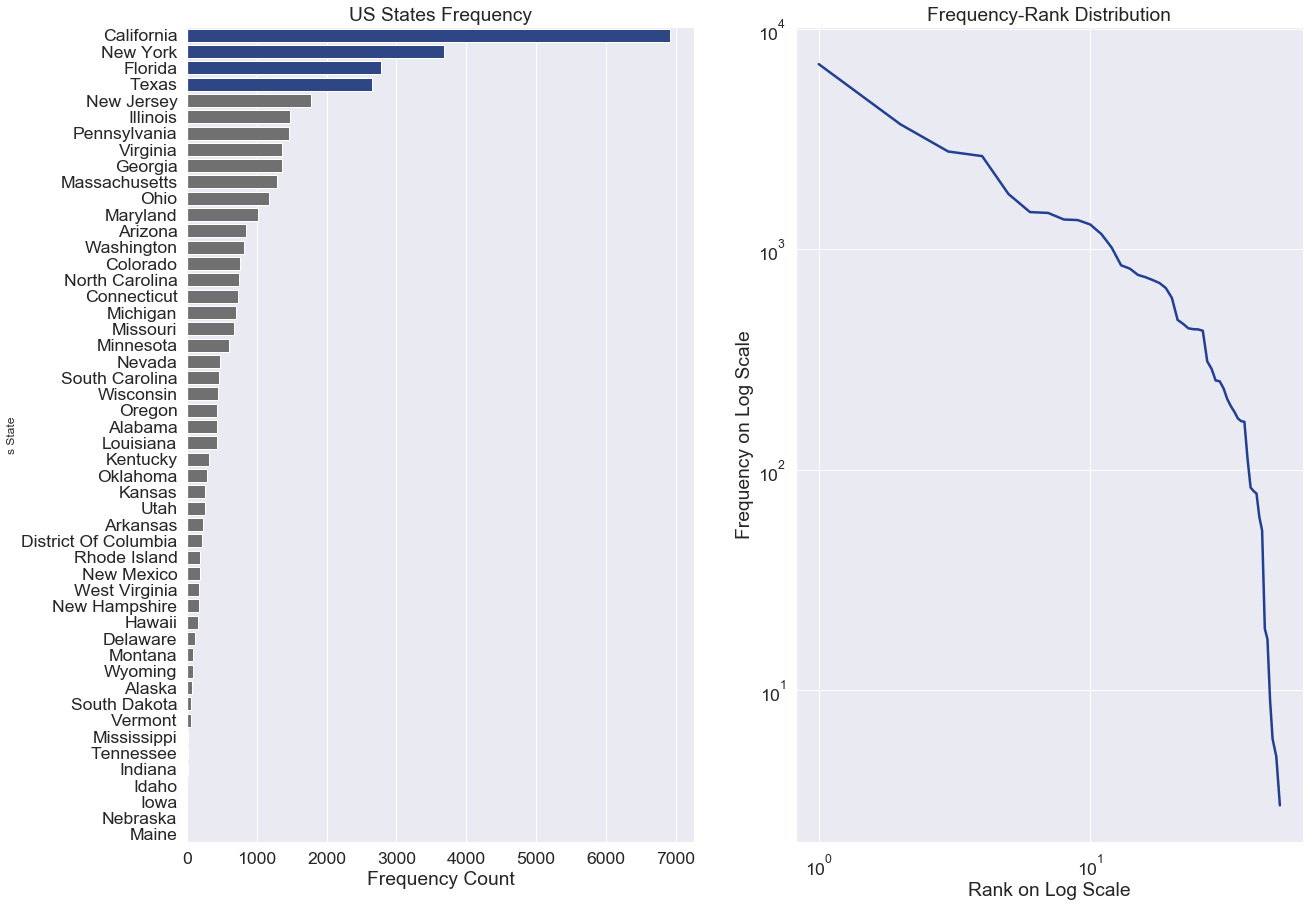

In [79]:
plt.figure(figsize=(20, 15))
plt.subplot(121)
clrs = ["#707070" if (x < 2000) else "#214093" for x in loans['us_state'].value_counts() ]
p = sns.countplot(data=loans, y = 'us_state',palette=clrs,
                  order=loans['us_state'].sort_values().value_counts().index.tolist())
p.set(ylabel='Us State', xlabel='Frequency Count',title='US States Frequency'
          ,yticklabels=loans['us_state'].sort_values().value_counts().index.str.title().tolist())
p.set_ylabel("s State",fontsize=12)
plt.subplot(122)
ax = sns.lineplot(x=loans['us_state'].value_counts().rank(ascending=False), 
                 y=loans['us_state'].value_counts(), data=loans,
                  palette="muted",linewidth=2.5, color="#214093",markers=True)
ax.set(ylabel='Frequency on Log Scale', xlabel='Rank on Log Scale',title='Frequency-Rank Distribution')
ax.set_xscale('log')
ax.set_yscale('log')


plt.show()

>**Observation:** We notice that most of the loan applications are from California.

**Segmented Univariate Analysis**

Text(0, 0.5, 's State')

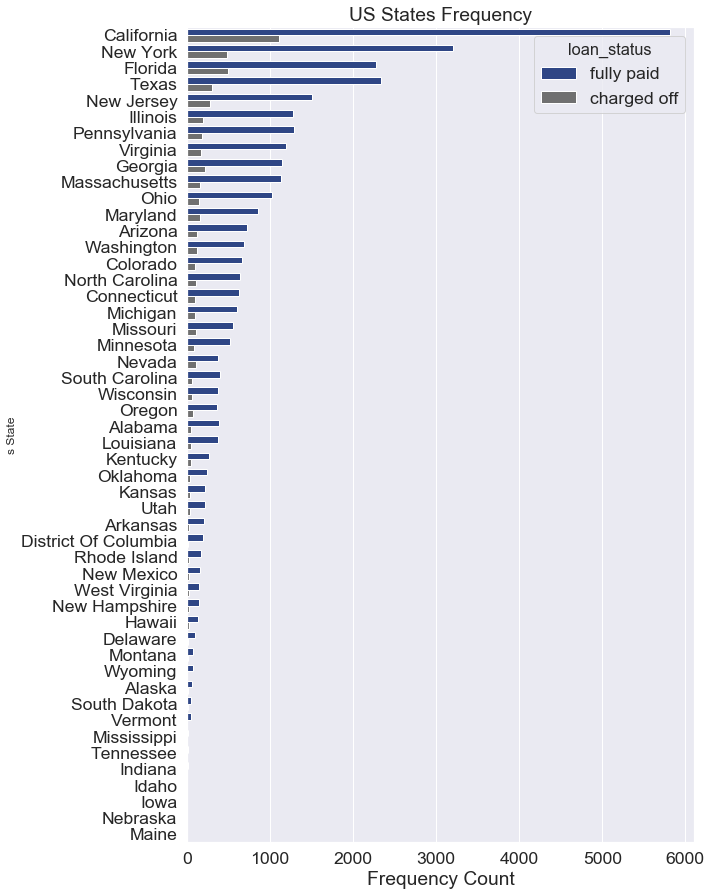

In [80]:
plt.figure(figsize=(20, 15))
plt.subplot(121)
clrs = ["#707070" if (x != 'fully paid') else "#214093" for x in loans['loan_status'].value_counts().index ]
p = sns.countplot(data=loans, y = 'us_state',palette=clrs,
                  order=loans['us_state'].sort_values().value_counts().index.tolist(),hue='loan_status')
p.set(ylabel='Us State', xlabel='Frequency Count',title='US States Frequency'
          ,yticklabels=loans['us_state'].sort_values().value_counts().index.str.title().tolist())
p.set_ylabel("s State",fontsize=12)

**Bivariate Analysis with loan_status chargeoff%**
 Let's group the data and get % of charged off loans

Text(0.5, 0.98, 'Fraction of loans by US States')

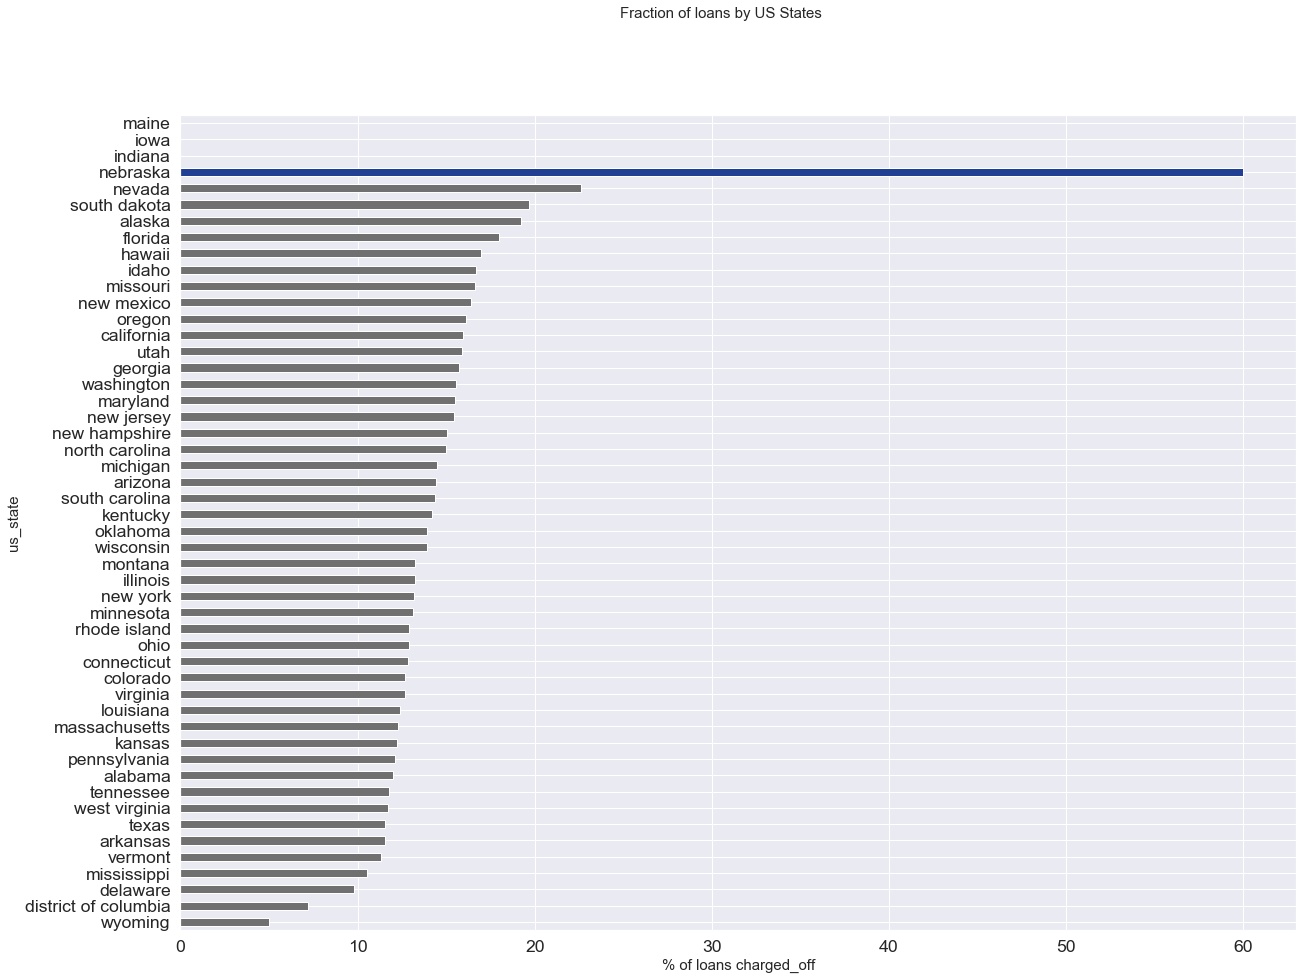

In [81]:
#Dataframe used for plotting loans by home ownership
by_us_state = loans.groupby(['loan_status', 'us_state'])['us_state'].count().unstack('loan_status')

#Create column for fraction of loans charged off for home ownership
by_us_state['ratio_charged_off'] = 100*by_us_state['charged off'] / (by_us_state['charged off'] + by_us_state['fully paid'])
by_us_state = by_us_state.sort_values(by='ratio_charged_off')
by_us_state


us_state_grp= loans.groupby(['us_state'])
clrs = ["#707070" if (x != 'nebraska') else "#214093" for x in by_us_state.index]

#Plot ratios against home ownership
by_us_state['ratio_charged_off'].plot(kind='barh',color=clrs,figsize=(20,15)) #figsize=(15,8)

#Labels
plt.xlabel('% of loans charged_off',fontsize=15)
plt.ylabel('us_state',fontsize=15)
plt.suptitle('Fraction of loans by US States',fontsize=15)

>**Observation:** We notice that even though statictically insignifant, a large number of popuation from Nebraska defaults loan.

Now' lets analyse the ordered categorical data points.

<a id='4.3.3'></a>
#### 4.3.3 Verification Status analysis

Indicates if income was verified by LC, not verified, or if the income source was verified


**Univariate Analysis:**

In [82]:
#Possible verification_status values?
loans['verification_status'].unique()

array(['verified', 'source verified', 'not verified'], dtype=object)

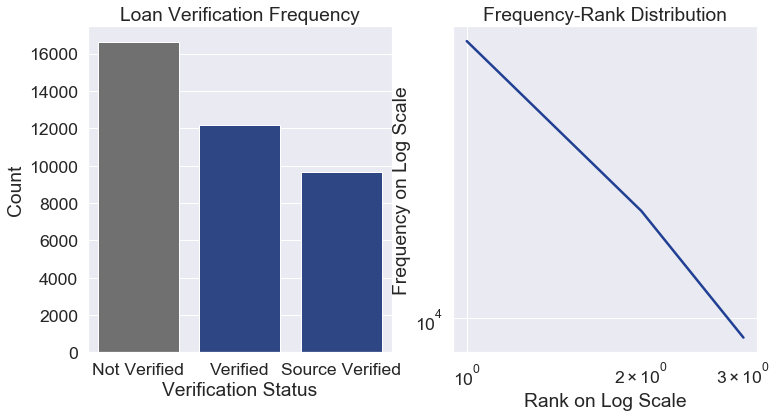

In [83]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
clrs = ["#707070" if (x > 13000) else "#214093" for x in loans['verification_status'].value_counts() ]
p = sns.countplot(data=loans, x = 'verification_status',palette=clrs,order=['not verified','verified','source verified'])
p.set(ylabel='Count', xlabel='Verification Status',title='Loan Verification Frequency'
          ,xticklabels=['Not Verified','Verified','Source Verified'])
plt.subplot(122)
ax = sns.lineplot(x=loans['verification_status'].value_counts().rank(ascending=False), 
                  y=loans['verification_status'].value_counts(), data=loans,
                 palette="muted",linewidth=2.5, color="#214093",markers=True)
ax.set(ylabel='Frequency on Log Scale', xlabel='Rank on Log Scale',title='Frequency-Rank Distribution')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

>**Observation:** We notice that the income of approx. 16k applicants was __not verified.__

**Bivariate Analysis:**

Text(0.5, 0.98, 'Fraction of charged off loans by Verification Status')

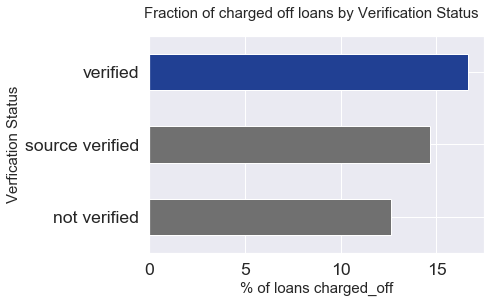

In [84]:

#Dataframe used for plotting loans by verification_status
by_verification_status = loans.groupby(['loan_status', 'verification_status'])['verification_status'].count().unstack('loan_status')

#Create column for fraction of loans charged off for verification_status
by_verification_status['ratio_charged_off'] = 100*by_verification_status['charged off'] / (by_verification_status['charged off'] + by_verification_status['fully paid'])
by_verification_status = by_verification_status.sort_values(by='ratio_charged_off')
by_verification_status

clrs = ["#707070" if (x != 'verified') else "#214093" for x in by_verification_status.index]

#Plot ratios against verification_status
by_verification_status['ratio_charged_off'].plot(kind='barh',color=clrs) #figsize=(15,8)

#Labels
plt.xlabel('% of loans charged_off',fontsize=15)
plt.ylabel('Verfication Status',fontsize=15)
plt.suptitle('Fraction of charged off loans by Verification Status',fontsize=15)

> **Conclusions on Verification Status:**
- Applicants are almost evenly distributed with respect to their verification status
- There appears to be no influence of verification status on charge off

Now, let's analyses the quantitative variables for customer.

#### 4.3.4 Revolving Line Utilization Rate (revol_util) Analysis
<a id='4.3.4'></a>

**Univariate Analysis:**

In [85]:
loans['revol_util'].head()
loans['revol_util'].shape
loans['revol_util'].describe()

count   38,458.00
mean        48.70
std         28.36
min          0.00
25%         25.20
50%         49.10
75%         72.30
max         99.90
Name: revol_util, dtype: float64

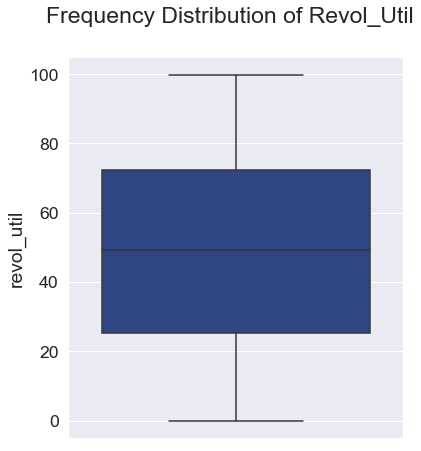

In [86]:
#Understand distribution through boxplot
plt.figure(1,figsize=(6,7))
sns.boxplot(loans['revol_util'],orient='v',color="#214093")
plt.suptitle("Frequency Distribution of Revol_Util")
plt.show()

**Segmented Univariate Analysis**

Let's now bin the above variables and analyse them further:

Now, Let's compare revol_util composition between charged off and fully paid loans when utilization rate is less then & greater than 1

Text(0.5, 1.0, 'Loan Status for Revolving Utilization Rate>1')

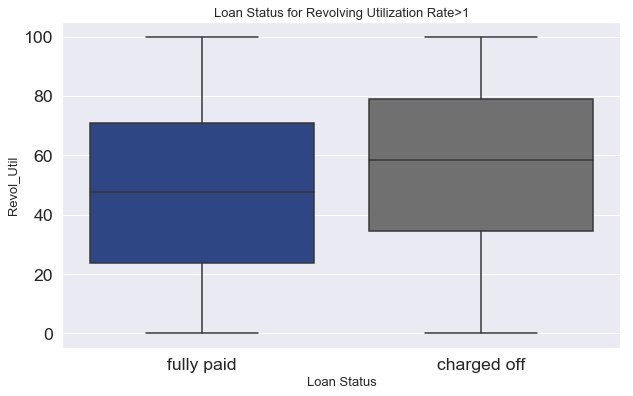

In [87]:
plt.figure(1,figsize=(10,6))
clrs = ["#707070" if (x != 'fully paid') else "#214093" for x in loans['loan_status'].value_counts().index ]
sns.boxplot(x='loan_status',y='revol_util', data=loans,palette=clrs)
plt.xlabel('Loan Status',fontsize=13)
plt.ylabel('Revol_Util',fontsize=13)
plt.title('Loan Status for Revolving Utilization Rate>1',fontsize=13)


**Bivariate Analysis**

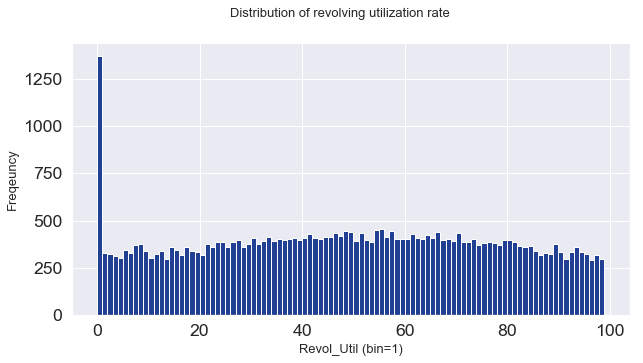

In [88]:
#Bin and find out which category of revolving utilization is most common
plt.figure(1,figsize=(10,5))
clrs = ["#707070" if (x < 2000) else "#214093" for x in loans['us_state'].value_counts() ]
loans['revol_util'].hist(color="#214093",bins=np.arange(loans['revol_util'].min(),loans['revol_util'].max(),1))
plt.xlabel('Revol_Util (bin=1)',fontsize=13)

    
plt.ylabel('Freqeuncy',fontsize=13)
plt.suptitle('Distribution of revolving utilization rate ',fontsize=13)
plt.show()

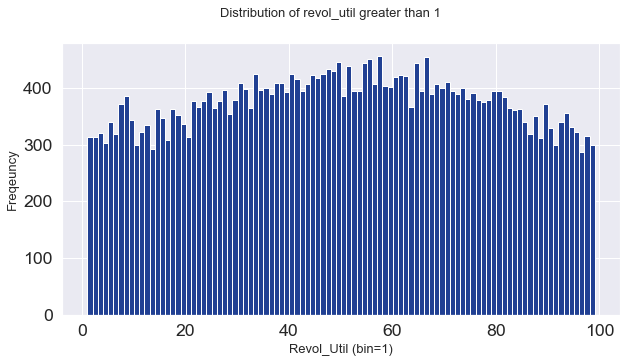

In [89]:
#Create column with rates greater than and less than 1
loans_revol_util_gr1 = loans[loans.revol_util>1]
loans_revol_util_gr1.shape

loans_revol_util_less1 = loans[loans.revol_util<1]
loans_revol_util_less1.shape

#Plot distribution when revol_util>1!
plt.figure(1,figsize=(10,5))
loans_revol_util_gr1['revol_util'].hist(color="#214093",bins=np.arange(loans_revol_util_gr1['revol_util'].min(),loans_revol_util_gr1['revol_util'].max(),1))
plt.xlabel('Revol_Util (bin=1)',fontsize=13)
plt.ylabel('Freqeuncy',fontsize=13)
plt.suptitle('Distribution of revol_util greater than 1 ',fontsize=13)
plt.show()

> **Conclusion on Revolving Line Utilization Rate:**
1. The distribution of utilization rates across applicants is even except between 0-1 rates. 
2. Based on the boxplot comparison and the correlation rate, it is evident that applicants with higher revolving line utilization rate are likely to default.
3. Although the sample size is small, based on its analysis it's likely that applicants with utilization rate<=1 are much less likely to default

#### 4.3.5 Customer Cerdit Lines Analysis
<a id='4.3.5'></a>

In [90]:
#Closed credit lines in credit file of applicant
print(loans['closed_acc'].shape)
print(loans['open_acc'].shape)
#Open credit lines in credit file of applicant

loans[['closed_acc','open_acc']].describe()

(38458,)
(38458,)


closed_acc  open_acc
count   38,458.00 38,458.00
mean        12.79      9.28
std          8.99      4.40
min         -6.00      2.00
25%          6.00      6.00
50%         11.00      9.00
75%         18.00     12.00
max         75.00     44.00

Text(0.5, 1.0, 'Frequency Distribution of Open Credit Line')

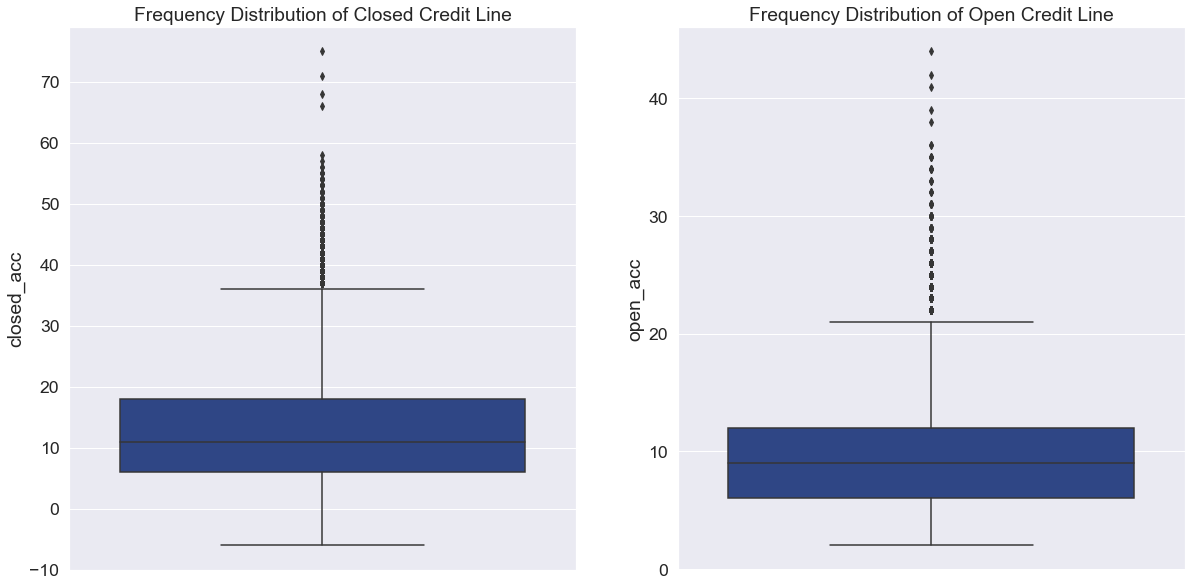

In [91]:
#Understand distribution through boxplot
plt.figure(1,figsize=(20,10))

#Closed credit line
plt.subplot(1,2,1)
sns.boxplot(loans['closed_acc'],orient='v',palette=clrs)
plt.title("Frequency Distribution of Closed Credit Line")

#Open credit line
plt.subplot(1,2,2)
sns.boxplot(loans['open_acc'],orient='v',palette=clrs)
plt.title("Frequency Distribution of Open Credit Line")


Text(0.5, 0.98, 'Distribution of Closed Credit Line')

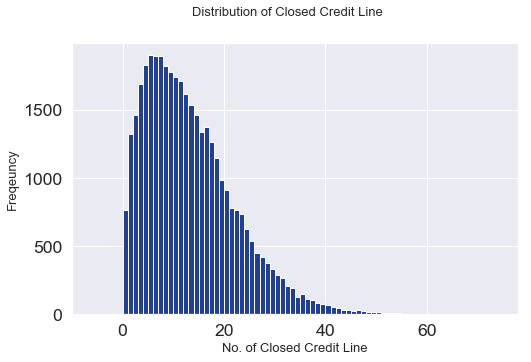

In [92]:
#Distribution of closed credit lines
plt.figure(1,figsize=(8,5))
loans['closed_acc'].hist(color="#214093",bins=np.arange(loans['closed_acc'].min(),loans['closed_acc'].max()))
plt.xlabel('No. of Closed Credit Line',fontsize=13)
plt.ylabel('Freqeuncy',fontsize=13)
plt.suptitle('Distribution of Closed Credit Line',fontsize=13)


Text(0.5, 0.98, 'Distribution of Open Credit Line')

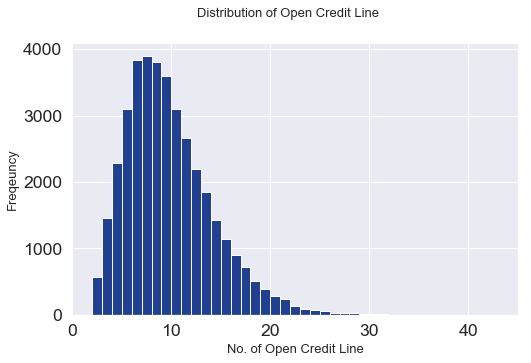

In [93]:
#Distribution of open credit line
plt.figure(1,figsize=(8,5))
loans['open_acc'].hist(color="#214093",bins=np.arange(loans['open_acc'].min(),loans['open_acc'].max()))
plt.xlabel('No. of Open Credit Line',fontsize=13)
plt.ylabel('Freqeuncy',fontsize=13)
plt.suptitle('Distribution of Open Credit Line',fontsize=13)

Now let's analyse __Fully paid vs Charged off__ for __open vs closed credit lines__

Text(0.5, 1.0, 'Loan Status for Open Credit Lines')

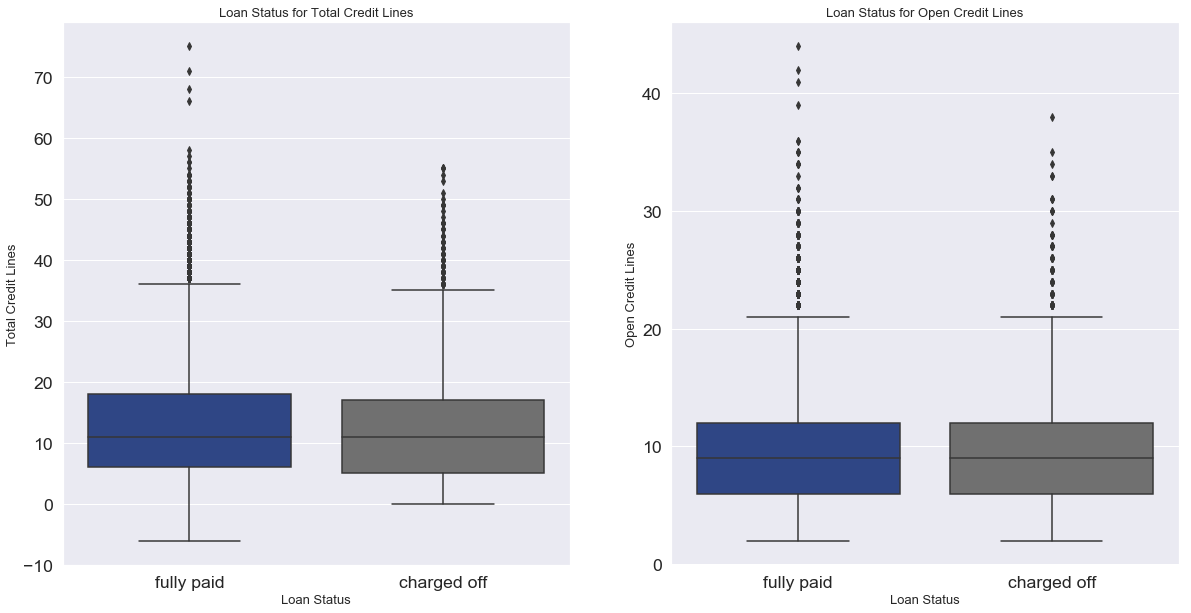

In [94]:
plt.figure(1,figsize=(20,10))
clrs = ["#707070" if (x != 'fully paid') else "#214093" for x in loans['loan_status'].value_counts().index ]
plt.subplot(1,2,1)
sns.boxplot(x='loan_status',y='closed_acc', data=loans,palette=clrs)
plt.xlabel('Loan Status',fontsize=13)
plt.ylabel('Total Credit Lines',fontsize=13)
plt.title('Loan Status for Total Credit Lines',fontsize=13)


plt.subplot(1,2,2)
sns.boxplot(x='loan_status',y='open_acc', data=loans,palette=clrs)
plt.xlabel('Loan Status',fontsize=13)
plt.ylabel('Open Credit Lines',fontsize=13)
plt.title('Loan Status for Open Credit Lines',fontsize=13)


>There's a possibility that the inverse relationship between credit lines & chargeoff is because a large number of applicants require a loan for the purpose of credit card and debt consolidation. Let's eliminate such loans and see if it changes the relationship of credit lines with charge off

Text(0.5, 1.0, 'Loan Status for Open Credit Lines')

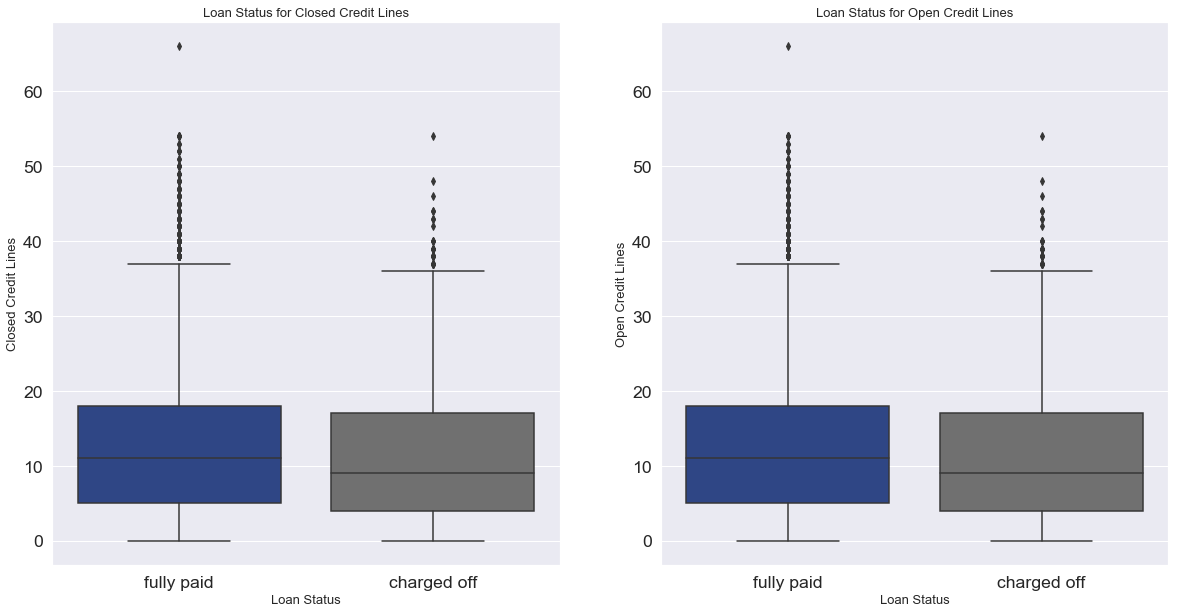

In [95]:
#Removing debt consolidation purpose
loans_nocc = loans[(loans.purpose!='debt_consolidation') & (loans.purpose!='credit_card')]
loans_nocc.purpose.unique()

plt.figure(1,figsize=(20,10))
clrs = ["#707070" if (x == 'fully paid') else "#214093" for x in loans['loan_status'].value_counts().index ]
#Closed credit lines vs loan status, no cc
plt.subplot(1,2,1)
sns.boxplot(x='loan_status',y='closed_acc', data=loans_nocc,palette=clrs).invert_xaxis()
plt.xlabel('Loan Status',fontsize=13)
plt.ylabel('Closed Credit Lines',fontsize=13)
plt.title('Loan Status for Closed Credit Lines',fontsize=13)

#Open credit lines vs loan status, no cc
plt.subplot(1,2,2)
sns.boxplot(x='loan_status',y='closed_acc', data=loans_nocc,palette=clrs).invert_xaxis()
plt.xlabel('Loan Status',fontsize=13)
plt.ylabel('Open Credit Lines',fontsize=13)
plt.title('Loan Status for Open Credit Lines',fontsize=13)


In [96]:
#Correlation analysis
corr = loans.corr('spearman').sort_values('charged_off', ascending=False)

# Correlation of closed_acc & charged_off 
corr.loc['closed_acc','charged_off']

# Correlation of open_acc & charged_off 
corr.loc['open_acc','charged_off']

-0.00908806753935079

> **Conclusion on Credit Lines:**
- There are several outliers wherein applicants have large number of credit lines. Besides these outliers, the credit lines are almost normally distributed among applicants. 
- Increase in lines of credit (open or closed) decreases the likelihood of charge_offs even when the purpose of loan is not credit card or debt

#### 4.3.6 Credit Inquiries in last 6 months Analysis
<a id='4.3.6'></a>

**Univariate Analysis:**

In [97]:
#Inquiries quick data review
loans['inq_last_6mths'].shape
loans['inq_last_6mths'].describe()
loans['inq_last_6mths'].unique()

array([1, 5, 2, 3, 0, 4, 6, 7, 8], dtype=int64)

Text(0.5, 1.0, 'Frequency Distribution of Credit Inquiries')

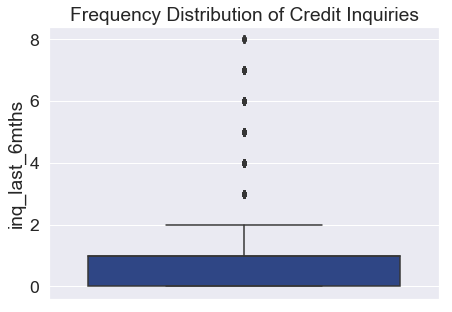

In [98]:
#Understand distribution through boxplot
plt.figure(1,figsize=(7,5))
clrs = ["#214093" ]
sns.boxplot(loans['inq_last_6mths'],orient='v',palette=clrs)
plt.title("Frequency Distribution of Credit Inquiries")

>**Observation:** No lower whisker is visible because the 25% percentile and the minimum value are the same. Let's use a histogram for better visualization

Text(0.5, 0.98, 'Distribution of Credit Inquiries')

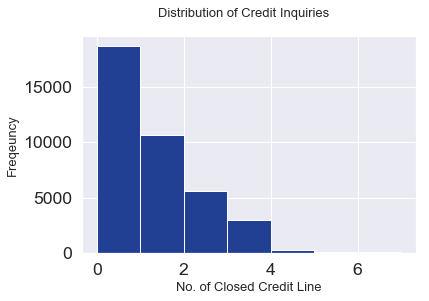

In [99]:
#Distribution of Credit Inquiries
loans['inq_last_6mths'].hist(color='#214093',bins=np.arange(loans['inq_last_6mths'].min(),loans['inq_last_6mths'].max()))
plt.xlabel('No. of Closed Credit Line',fontsize=13)
plt.ylabel('Freqeuncy',fontsize=13)
plt.suptitle('Distribution of Credit Inquiries',fontsize=13)


**Segmented Univariate**

Text(0.5, 1.0, 'Loan Status for Credit Inquiries')

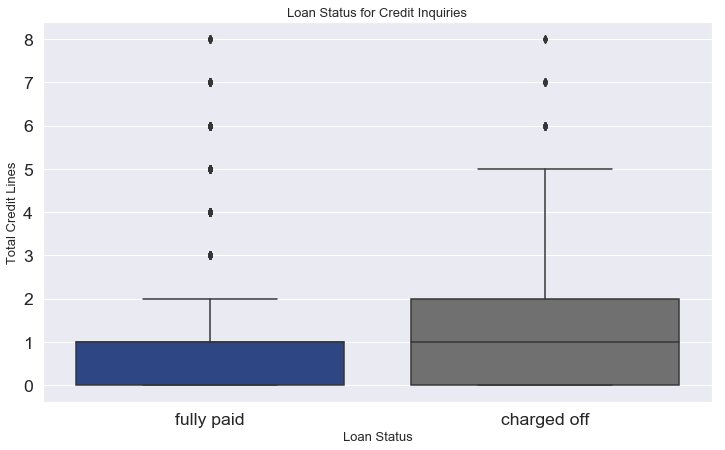

In [100]:
#Fully paid vs Charged off for open vs closed credit lines
plt.figure(1,figsize=(12,7))

clrs = ["#707070" if (x != 'fully paid') else "#214093" for x in loans['loan_status'].value_counts().index ]
# plt.subplot(1,2,1)
sns.boxplot(x='loan_status',y='inq_last_6mths', data=loans,palette=clrs)
plt.xlabel('Loan Status',fontsize=13)
plt.ylabel('Total Credit Lines',fontsize=13)
plt.title('Loan Status for Credit Inquiries',fontsize=13)


In [101]:
# Correlation of credit inquiries
corr = loans.corr('spearman')
corr.loc['inq_last_6mths','charged_off']

0.07164874658400824

> **Conclusion on Credit Enquiries:**
- Majority of the applications have zero credit inquiries.
- With increase in credit inquiries beyond 1, the likelihood of charge_offs increases. Outliers may swing either ways i.e. they may pay fully or default

<a id='4.4'></a>
### 4.4 Requested Loan  Attributes

In [102]:
loans[credit_attr].head(2)

title  loan_amnt       term      purpose
0  computer   5,000.00  36 months  credit_card
1      bike   2,500.00  60 months          car

Key attributes of the loan requested by loan applicant to be analyzed are:
* Loan amount (Quantitative)
* Term (Ordered Categorical)
* purpose (Unordered Categorical)
* title (Unordered Categorical)

#### 4.4.1 Loan Amount Analysis
<a id='4.4.1'></a>

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**Univariate Analysis:**

Let's understand the spread of the data.

Text(0.5, 0.98, 'Violin Plot of loan amount')

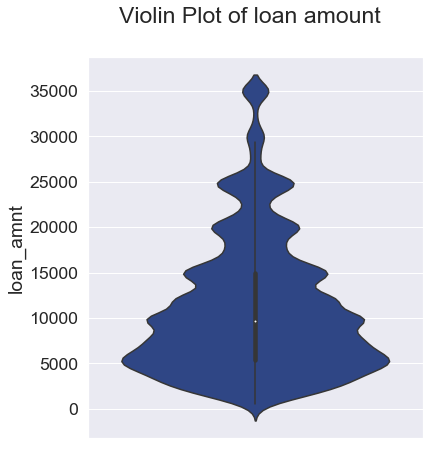

In [103]:
#Analyze distribution of values
plt.figure(1,figsize=(6,7))
loanamnt = loans['loan_amnt']
loanamnt.describe()
sns.violinplot(loanamnt,orient='v',palette=clrs)
plt.suptitle('Violin Plot of loan amount')

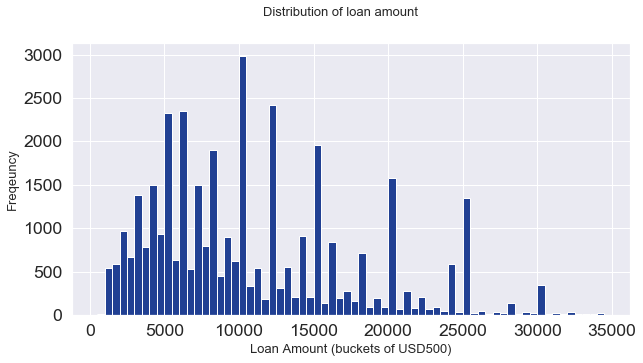

In [104]:
#Bin loan amounts and find out which category of loan amounts is most often applied for
plt.figure(1,figsize=(10,5))
loanamnt.hist(color="#214093" ,bins=np.arange(loanamnt.min(),loanamnt.max(),500))
plt.xlabel('Loan Amount (buckets of USD500)',fontsize=13)
plt.ylabel('Freqeuncy',fontsize=13)
plt.suptitle('Distribution of loan amount ',fontsize=13)
plt.show()

**Segmented Univariate Analysis:**

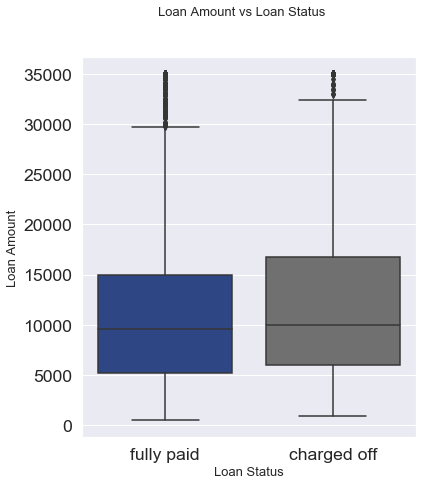

In [105]:
#Compare loan amount composition between charged off and fully paid loans
plt.figure(1,figsize=(6,7))
sns.boxplot(x='loan_status',y='loan_amnt', data=loans,palette=clrs)
plt.xlabel('Loan Status',fontsize=13)
plt.ylabel('Loan Amount',fontsize=13)
plt.suptitle('Loan Amount vs Loan Status ',fontsize=13)
plt.show()

In [106]:
# Correlation of loan amount & charged_off
corr = loans.corr('spearman').sort_values('charged_off', ascending=False)
corr.loc['loan_amnt','charged_off']

0.050569527710992844

>**Observations on loan_amt:**
- Loan amounts are fairly symmetrically distributed with a median of USD 10,000. Most loan amounts are in the USD 5K-10K range followed by the USD 500-5K range
- Charged off loans tend to have slighter higher loan amounts compared to fully paid loans. However, the correlation coefficient of 0.05 makes this relationship inconclusive

#### 4.4.2 Term  Analysis
<a id='4.4.2'></a>

The number of payments on the loan. Values are in months and can be either 36 or 60.

In [107]:
#How many terms?
loans['term'].unique()

array(['36 months', '60 months'], dtype=object)

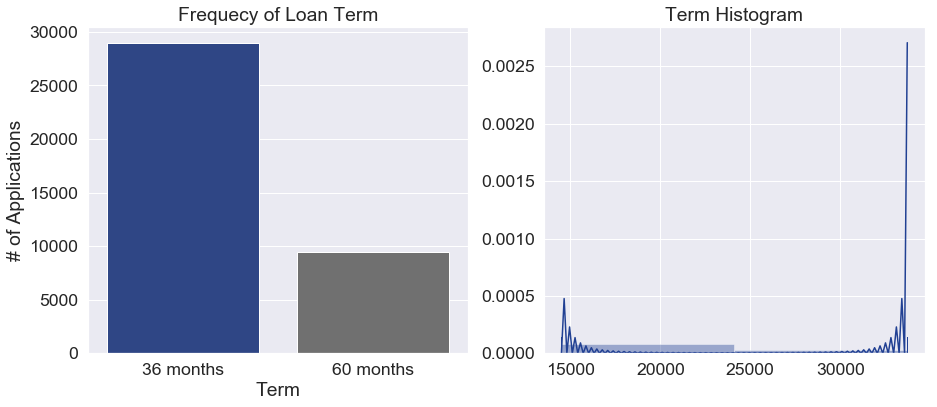

In [108]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
clrs = ["#707070" if (x < 15000) else "#214093" for x in loans['term'].value_counts() ]
ax = sns.barplot(x=loans['term'].value_counts().index,
                 y=loans['term'].value_counts(), data=loans,palette=clrs)
ax.set(ylabel='# of Applications', xlabel='Term',title='Frequecy of Loan Term')
#          ,yticklabels=loan['us_state'].sort_values().value_counts().index.str.title().tolist())
plt.subplot(122)
hg=sns.distplot(loans['term'].rank(),rug=True,hist=True,bins=2,color="#214093")
hg.set(ylabel='', xlabel='',title='Term Histogram')
plt.show()

**Segmented Univariate Analysis**

Text(0.5, 0.98, 'Term composition of Loans')

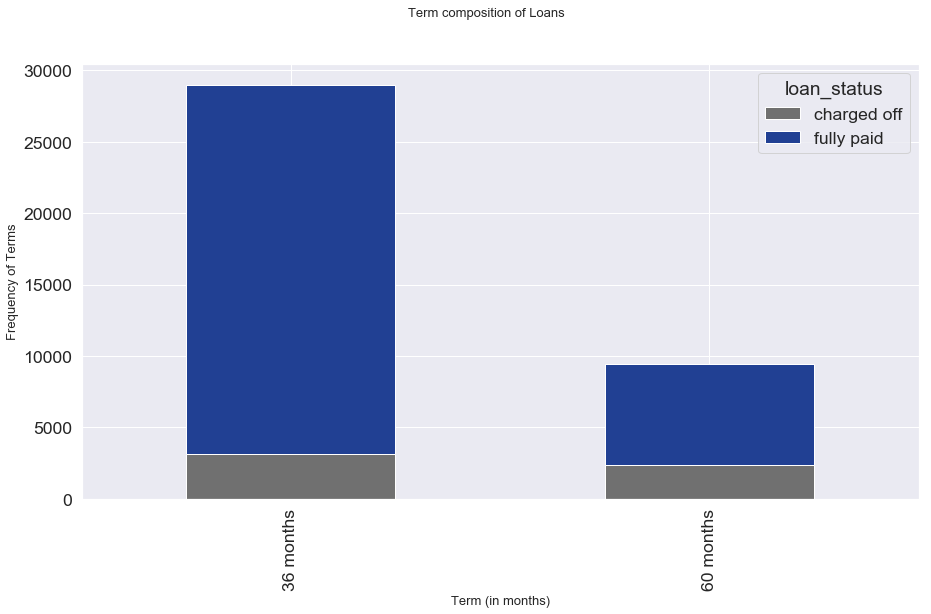

In [109]:
#Dataframe used for plotting stack chart
stacked_df = loans.groupby(['loan_status', 'term'])['term'].count().unstack('loan_status')
stacked_df

#Plot graph
stacked_df.plot(kind='bar', stacked=True,figsize=(15,8),color=["#707070","#214093"])

#Labels
plt.xlabel('Term (in months)',fontsize=13)
plt.ylabel('Frequency of Terms',fontsize=13)
plt.suptitle('Term composition of Loans',fontsize=13)


>**Observations on term:**
- There is a preference for short-term loans of 36 months
- 60 month loans have a significantly higher proprtion of charged off loans compared to 30 month loans. Therefore, there is a higher likelyhood that 60 month loans may charged off compared to 30 month loans.

#### 4.4.3 Purpose Analysis
<a id='4.4.3'></a>

A category provided by the borrower for the loan request. 

**Univariate Analysis:**

In [110]:
#How many purposes?
loans['purpose'].unique()
loans.shape

(38458, 33)

[Text(0, 0.5, 'Purpose'),
 Text(0.5, 0, 'Frequency Count'),
 Text(0.5, 1.0, 'Loan Purpose Frequency')]

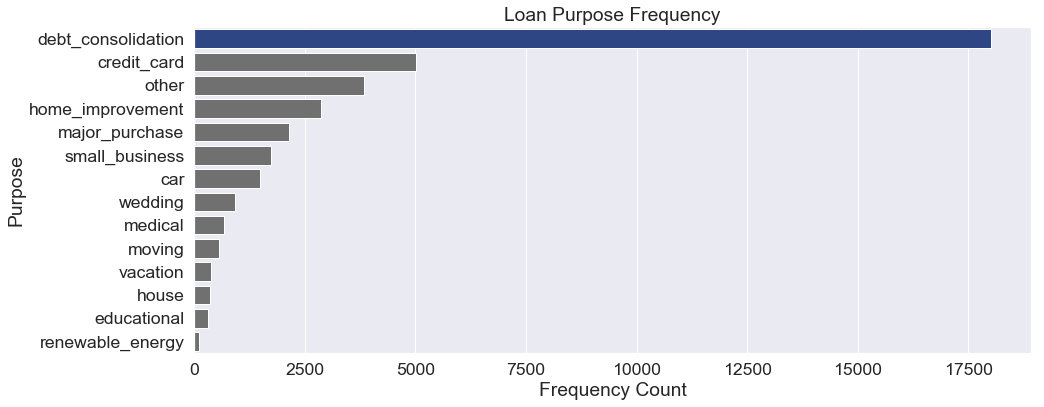

In [111]:
plt.figure(figsize=(15, 6))
clrs = ["#707070" if (x < 10000) else "#214093" for x in loans['purpose'].value_counts() ]
p = sns.countplot(data=loans, y = 'purpose',palette=clrs,
                  order=loans['purpose'].sort_values().value_counts().index.tolist())
p.set(ylabel='Purpose', xlabel='Frequency Count',title='Loan Purpose Frequency')
 #         ,yticklabels=loans['us_state'].sort_values().value_counts().index.str.title().tolist())

**Bivariate Analysis:**

Text(0.5, 0.98, 'Fraction of loans Charged Off by Purpose')

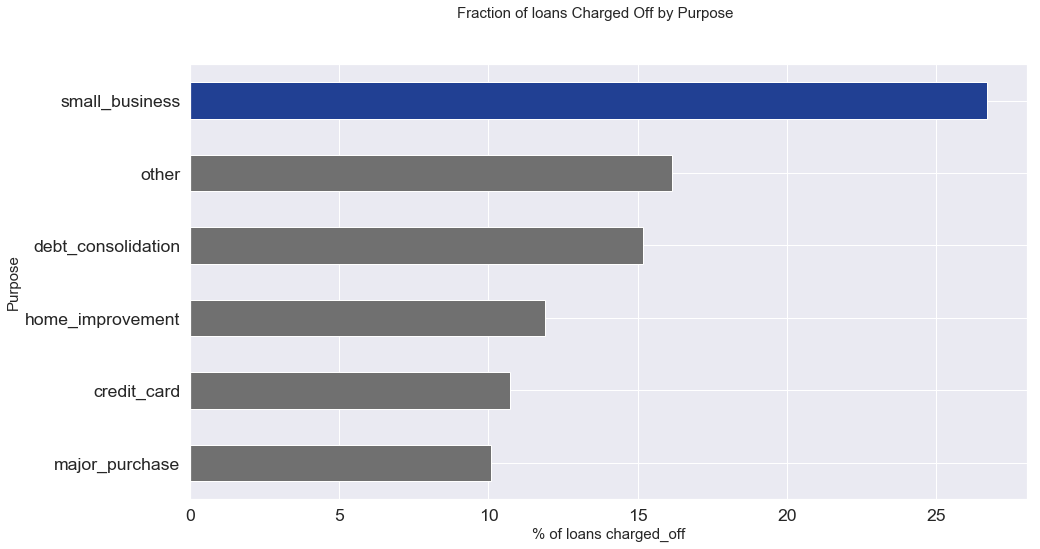

In [112]:
#Dataframe used for plotting loans by purpose
groupby_purpose = loans.groupby(['loan_status', 'purpose'])['purpose'].count().unstack('loan_status')

#Dropping purposes with statistically insignificant volume
groupby_purpose.drop(index=['car', 'wedding', 'medical', 'moving', 'vacation', 'house', 'educational', 'renewable_energy'],inplace=True)

#Create column for fraction of loans charged off for each purpose
groupby_purpose['ratio_charged_off'] = 100*groupby_purpose['charged off'] / (groupby_purpose['charged off'] + groupby_purpose['fully paid'])
groupby_purpose = groupby_purpose.sort_values(by='ratio_charged_off')
groupby_purpose

#Plot ratios against purpose
groupby_purpose['ratio_charged_off'].plot(color=["#707070","#707070","#707070","#707070","#707070","#214093"],kind='barh', figsize=(15,8))

#Labels
plt.xlabel('% of loans charged_off',fontsize=15)
plt.ylabel('Purpose',fontsize=15)
plt.suptitle('Fraction of loans Charged Off by Purpose',fontsize=15)

In [113]:
#Mean ratio of charged off by purpose
groupby_purpose['ratio_charged_off'].mean()

15.12678033821887

**Observations on Purpose:**

* Top 3 reasons for loans include Debt Consolidation, Debt & Others
* On average, 15% of loans get charged off for all loans. However, almost twice as many (27%) loans taken for Small Business get charged off. Therefore, there is a high likelihood of __small business loans getting charged off.__

<a id='4.5'></a>
### 4.5 Approved Loan Attributes

Key attributes of the approved loan applicant to be analyzed are:
- Active Payment Days (Discrete Quantitative)
- Grade (Ordered Categorical)
- Interest Rate (Continous Quantitaive)

In [114]:
loans[loan_given_attr].head(2)

active_pymnt_days  funded_amnt  int_rate grade
0               1127     5,000.00     10.65     b
1                487     2,500.00     15.27     c

#### 4.5.1 Active Payment Days (active_pymnt_days) Analysis
<a id='4.5.1'></a>

Number of days for which the debtor was paying the loan. 

**Univariate Analysis:**

In [115]:
loans['active_pymnt_days'].describe()

count   38,458.00
mean       864.32
std        411.76
min         28.00
25%        548.00
50%        946.00
75%      1,124.00
max      2,130.00
Name: active_pymnt_days, dtype: float64

Let's now analyze active payment days for loans that get charged_off vs those that are fully paid

Text(0.5, 0.98, 'Violin Plot of Active Payment Days')

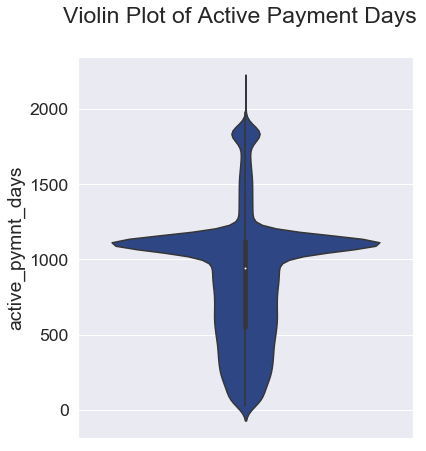

In [116]:
#Analyze distribution of values
plt.figure(1,figsize=(6,7))
loanamnt = loans['active_pymnt_days']
loanamnt.describe()
sns.violinplot(loanamnt,orient='v',palette=clrs)
plt.suptitle('Violin Plot of Active Payment Days')

>**Observation:** We notice that an average value of 946 days (~ 2.5 years)

**Bivariate Analysis:**

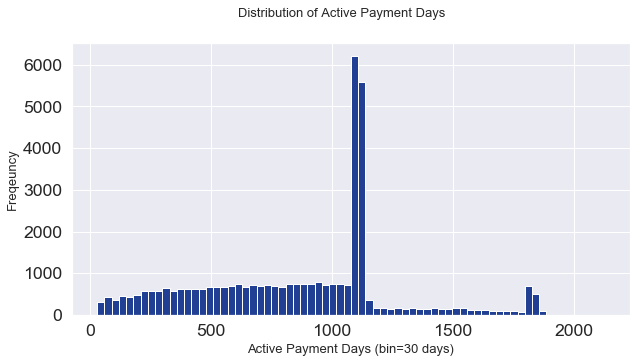

In [117]:
#Distribution of active_pymnt_days
plt.figure(1,figsize=(10,5))
loans['active_pymnt_days'].hist(color="#214093",bins=np.arange(loans['active_pymnt_days'].min(),loans['active_pymnt_days'].max(),30))
plt.xlabel('Active Payment Days (bin=30 days)',fontsize=13)
plt.ylabel('Freqeuncy',fontsize=13)
plt.suptitle('Distribution of Active Payment Days',fontsize=13)
plt.show()

Earlier, we noticed that `active_pymnt_days` is highly correlated to `total_pymnt`. Let's have a look by plotting a line graph:

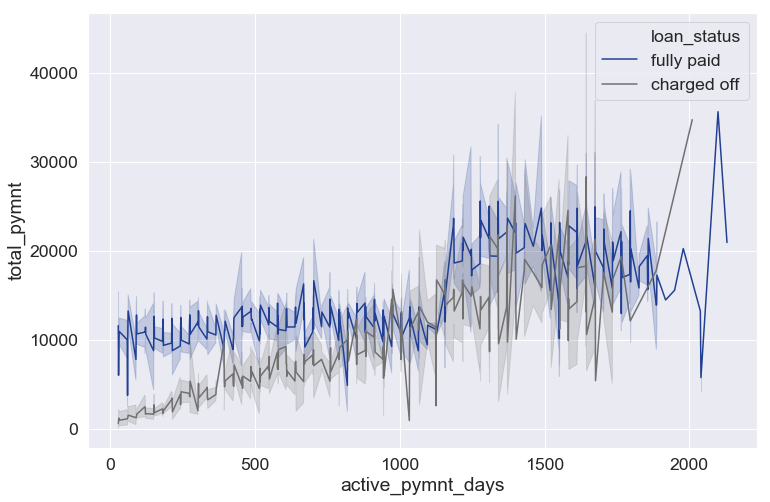

In [118]:
plt.figure(1,figsize=(12,8))
clrs = ["#707070" if (x != 'fully paid') else "#214093" for x in loans['loan_status'].value_counts().index ]
ax = sns.lineplot(x=loans['active_pymnt_days'], y=loans['total_pymnt'], data=loans, hue='loan_status',palette=clrs)
plt.show()

> **Observation:** We can observe peaks in payment days at 36 months (1080 days) and 60 days (1800 days) given that most loans are for 36 months.
    
>Now, consider the following:
- Most loans are for a term of 36 months
- 60 month loans have a tendency to default over 30 month loans 
- Analyzing number of days of payment which depends on the term (30 or 60) of the loan

> **Let's therefore focus the analysis of active payment days on the 36 month termed loans only.**

**Observing the Line Graph** - We can clearly see a positive correlation here

In [119]:
#Create df of loans with only 36 month term loans
loans_36m = loans[loans.term=='36 months']
loans_36m['active_pymnt_days'].describe()

count   28,997.00
mean       813.65
std        334.72
min         28.00
25%        548.00
50%        943.00
75%      1,096.00
max      2,130.00
Name: active_pymnt_days, dtype: float64

>**Let's further segment the 36 month loans into charged off vs paid loans**

In [120]:
#Create dataframes with loans that are charged_off and those that are fully paid

loans_paid = loans_36m[loans_36m.charged_off==0]
loans_paid.shape
loans_paid['active_pymnt_days'].describe()

loans_charged_off = loans_36m[loans.charged_off==1]
loans_charged_off.shape
loans_charged_off['active_pymnt_days'].describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



count   3,163.00
mean      514.81
std       287.81
min        28.00
25%       274.00
50%       487.00
75%       731.00
max     1,885.00
Name: active_pymnt_days, dtype: float64

Text(0.5, 1.0, 'Distribution of Active Payment Days for Charged Off Loans')

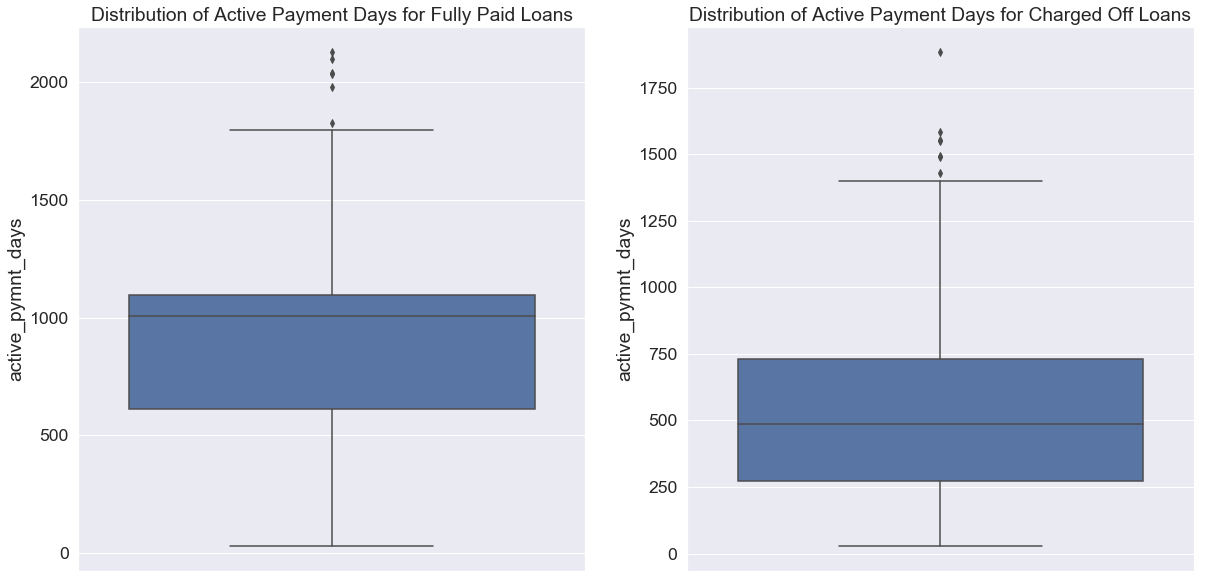

In [121]:
#Compare distributions of fully paid vs charged off loans

plt.figure(1,figsize=(20,10))

plt.subplot(1,2,1)
sns.boxplot(loans_paid['active_pymnt_days'],orient='v')
plt.title("Distribution of Active Payment Days for Fully Paid Loans")


plt.subplot(1,2,2)
sns.boxplot(loans_charged_off['active_pymnt_days'],orient='v')
plt.title("Distribution of Active Payment Days for Charged Off Loans")


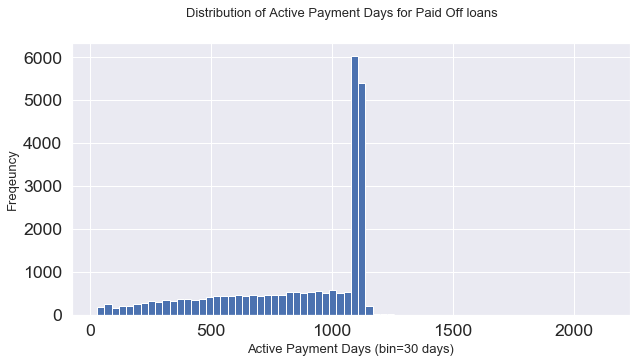

In [122]:
#Bin days and find out which when most fully paid loans get paid out
plt.figure(1,figsize=(10,5))
loans_paid['active_pymnt_days'].hist(bins=np.arange(loans_paid['active_pymnt_days'].min(),loans_paid['active_pymnt_days'].max(),30))
plt.xlabel('Active Payment Days (bin=30 days)',fontsize=13)
plt.ylabel('Freqeuncy',fontsize=13)
plt.suptitle('Distribution of Active Payment Days for Paid Off loans',fontsize=13)
plt.show()

>

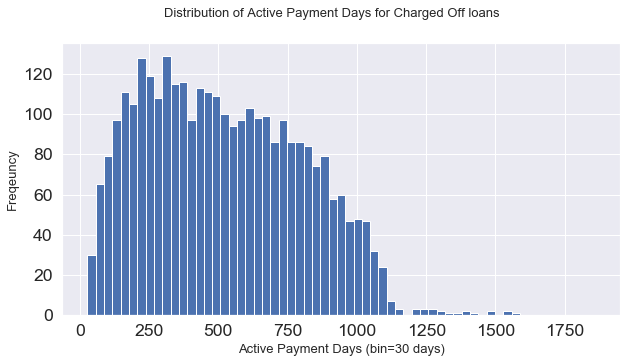

In [123]:
#Bin days and find out which how many days before loans default
plt.figure(1,figsize=(10,5))
loans_charged_off['active_pymnt_days'].hist(bins=np.arange(loans_charged_off['active_pymnt_days'].min(),loans_charged_off['active_pymnt_days'].max(),30))
plt.xlabel('Active Payment Days (bin=30 days)',fontsize=13)
plt.ylabel('Freqeuncy',fontsize=13)
plt.suptitle('Distribution of Active Payment Days for Charged Off loans',fontsize=13)
plt.show()

In [124]:
# Correlation of active_pymnt_days & charged_off 
corr = loans_36m.corr('spearman')
corr.loc['active_pymnt_days','charged_off']

-0.31113986569836155

> **Conclusion on Active Payment Days (for 36 month loans):**
- Most paid out loans get paid around the 36 month time frame, but about 25% of the debtors are late with their payments going beyond the 36-month deadline.
- Loan defaults/charge-offs occur fairly evenly ranging from less than a year to over 2 years. However, 50% of the loans are defaulted within half the term i.e. 18 months.
- Although the sample size is smaller for charged_off loans, based on the charts and the correlation rate, it is evident that defaulters default much early on compared to loans that will go on to be fully paid

#### 4.5.2 Grade
<a id='4.5.2'></a>

Number of days for which the debtor was paying the loan. 

**Univariate Analysis:**

[Text(0, 0.5, '# of Applications'),
 Text(0.5, 0, 'Grade'),
 Text(0.5, 1.0, '# Applications Grade wise')]

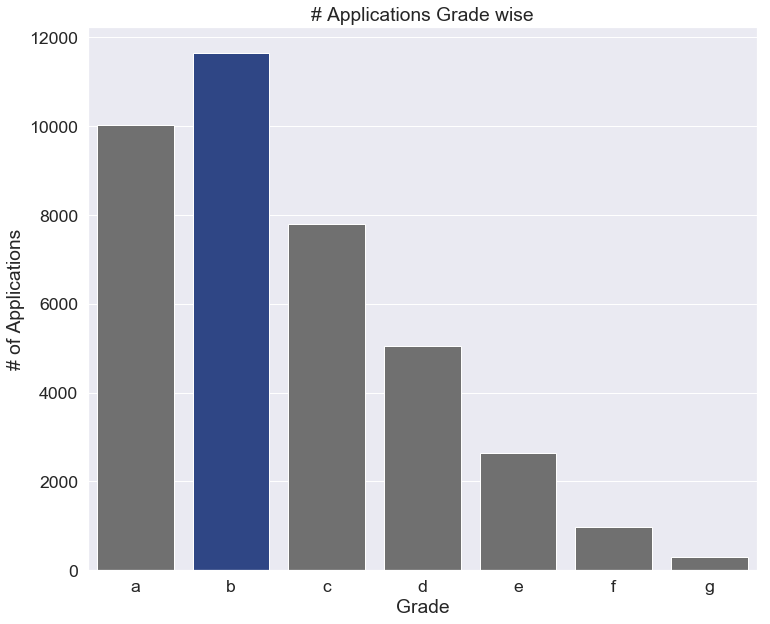

In [125]:
plt.figure(figsize=(12, 10))
loan_grade = loans.groupby(['grade'])
clrs = ["#707070" if (x != 'b') else "#214093" for x in loan_grade.groups.keys()]
ax = sns.barplot(x=loans['grade'].value_counts().index,
                 y=loans['grade'].value_counts(), data=loans,palette=clrs,order=['a','b','c','d','e','f','g'])
ax.set(ylabel='# of Applications', xlabel='Grade',title='# Applications Grade wise')
#          ,yticklabels=loan['us_state'].sort_values().value_counts().index.str.title().tolist())

>**Observation:** Clearly, b is the highest grade of applications.

**Bivariate Analysis with charged off loan %**

Text(0.5, 0.98, 'Fraction of loans by US States')

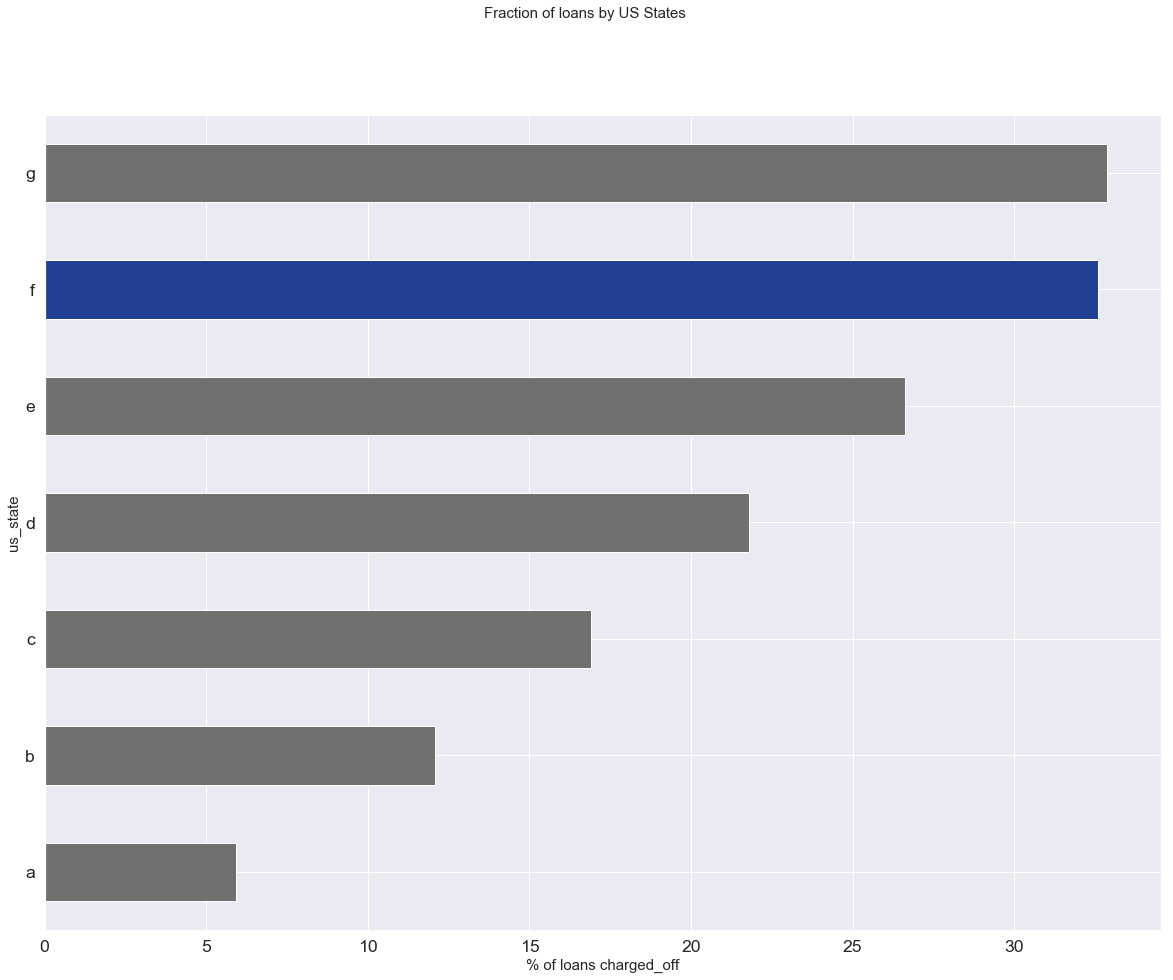

In [126]:
#Dataframe used for plotting loans by home ownership
by_grade = loans.groupby(['loan_status', 'grade'])['grade'].count().unstack('loan_status')
#Create column for fraction of loans charged off for home ownership
by_grade['ratio_charged_off'] = 100*by_grade['charged off'] / (by_grade['charged off'] + by_grade['fully paid'])
by_grade = by_grade.sort_values(by='ratio_charged_off')
gradee_grp= loans.groupby(['grade'])
clrs = ["#707070" if ( x != 'f') else "#214093" for x in by_grade.index]
#Plot ratios against home ownership
by_grade['ratio_charged_off'].plot(kind='barh',color=clrs,figsize=(20,15)) #figsize=(15,8)
#Labels
plt.xlabel('% of loans charged_off',fontsize=15)
plt.ylabel('us_state',fontsize=15)
plt.suptitle('Fraction of loans by US States',fontsize=15)

>**Observation:** We notice that most of the charged off loans fall under grade  __f__.

#### 4.5.3 Interest Rate
<a id='4.5.3'></a>

Rate of Interest of the Loan. 

**Univariate Analysis:**

Let's start by analysing the spread of the variable:


In [127]:
loans[['int_rate']].describe()

int_rate
count 38,458.00
mean      11.92
std        3.69
min        5.42
25%        8.94
50%       11.71
75%       14.35
max       24.40

Text(0.5, 1.0, 'Loan Status for Credit Inquiries')

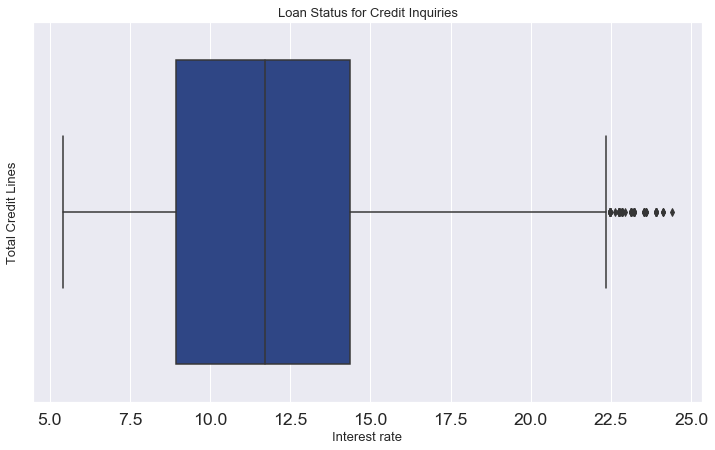

In [128]:
plt.figure(1,figsize=(12,7))
clrs = ["#707070" if (x != 'fully paid') else "#214093" for x in loans['loan_status'].value_counts().index ]
# plt.subplot(1,2,1)
ax = sns.boxplot(x=loans['int_rate'],palette=clrs)
plt.xlabel('Interest rate',fontsize=13)
plt.ylabel('Total Credit Lines',fontsize=13)
plt.title('Loan Status for Credit Inquiries',fontsize=13)

#### We can clearly note that there are lot of outliers in the data above and hence must be removed.

#### 4.5.3.1 Removing Outliers:
<a id='4.5.3.1'></a>

__Definition:__ An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.

Outliers can skewed our aalysis and hence must be removed The best way of rmoving these is by __removing any values that lies 1.5 times of IQR__

IQR = 75 Percetile - 25 Percentile

In [129]:
int_rate_iqr = loans['int_rate'].quantile(.75) - loans['int_rate'].quantile(.25)

In [130]:
upper_range = loans['int_rate'].quantile(.75) + int_rate_iqr*1.5
print("Upper Range of Outliers is: ",upper_range)
lower_range = loans['int_rate'].quantile(.25) - int_rate_iqr*1.5
print("Lower Range of Outliers is: ",lower_range)

Upper Range of Outliers is:  22.465
Lower Range of Outliers is:  0.8249999999999993


Now let's remove the loans where the values are outliers


In [131]:
loans.shape

(38458, 33)

In [132]:
loans= loans[loans['int_rate']>= lower_range]
loans= loans[loans['int_rate']<= upper_range]

In [133]:
loans.shape

(38377, 33)

Let's analyse the box plot again after removing the outliers

Text(0.5, 1.0, 'Loan Status for Credit Inquiries')

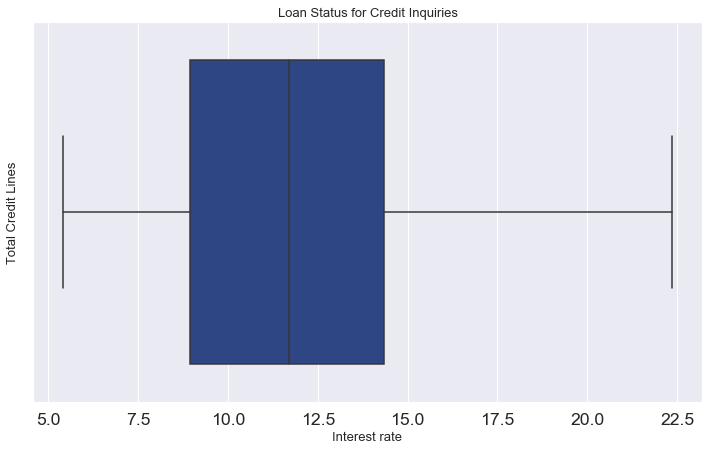

In [134]:
plt.figure(1,figsize=(12,7))
clrs = ["#707070" if (x != 'fully paid') else "#214093" for x in loans['loan_status'].value_counts().index ]
# plt.subplot(1,2,1)
ax = sns.boxplot(x=loans['int_rate'],palette=clrs)
plt.xlabel('Interest rate',fontsize=13)
plt.ylabel('Total Credit Lines',fontsize=13)
plt.title('Loan Status for Credit Inquiries',fontsize=13)

#### We notice that now the plot does not contain any outliers.

We have identified most of the variables and have removed outliers. Let's now move to Bivariate of above segments.

<a id='4.6'></a>
### 4.6 Bivariate Analysis of various variable types (buckets)

In this section, we will analyse variables from different buckets we created above.

<a id='4.6.1'></a>
#### 4.6.1 Bivariate Analysis with Loan Grade

#### grade vs home_ownership

Text(0.5, 0.98, 'Grade composition of Loans by Purpose')

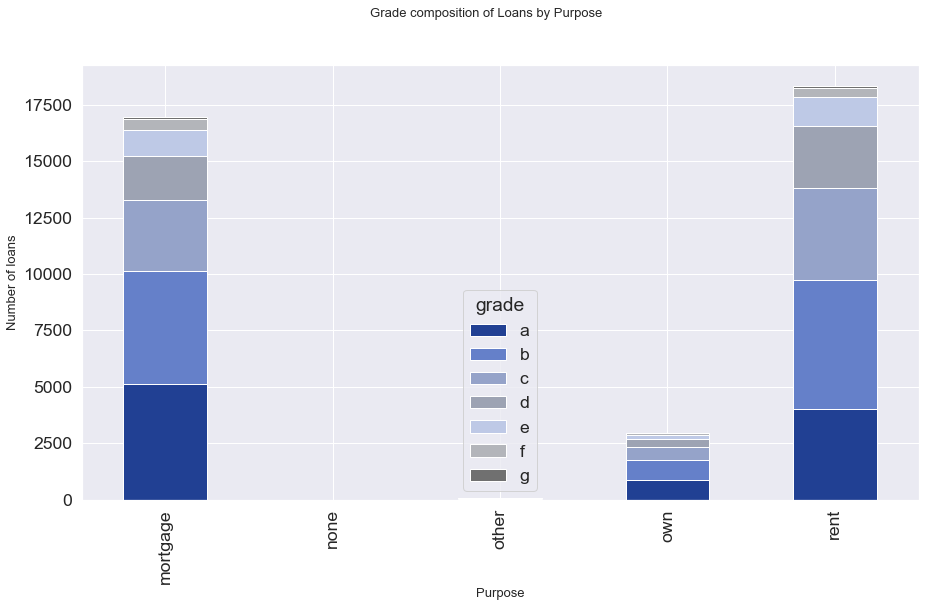

In [135]:
#Dataframe used for plotting stack chart
by_home_ownership = loans.groupby(['grade', 'home_ownership'])['home_ownership'].count().unstack('grade')
#Plot graph
by_home_ownership.plot(color=["#214093",'#6580c9','#95a3c9','#9da3b3','#bec9e6','#b3b5ba',"#707070"],kind='bar', stacked=True,figsize=(15,8))
#Labels
plt.xlabel('Purpose',fontsize=13)
plt.ylabel('Number of loans',fontsize=13)
plt.suptitle('Grade composition of Loans by Purpose',fontsize=13)

> **Observations:**
- Mortgage and Rent have highest loans in either grade 'a' or 'b'

####  grade vs verification Status

Text(0.5, 0.98, 'Grade composition of Loans by Verification Status')

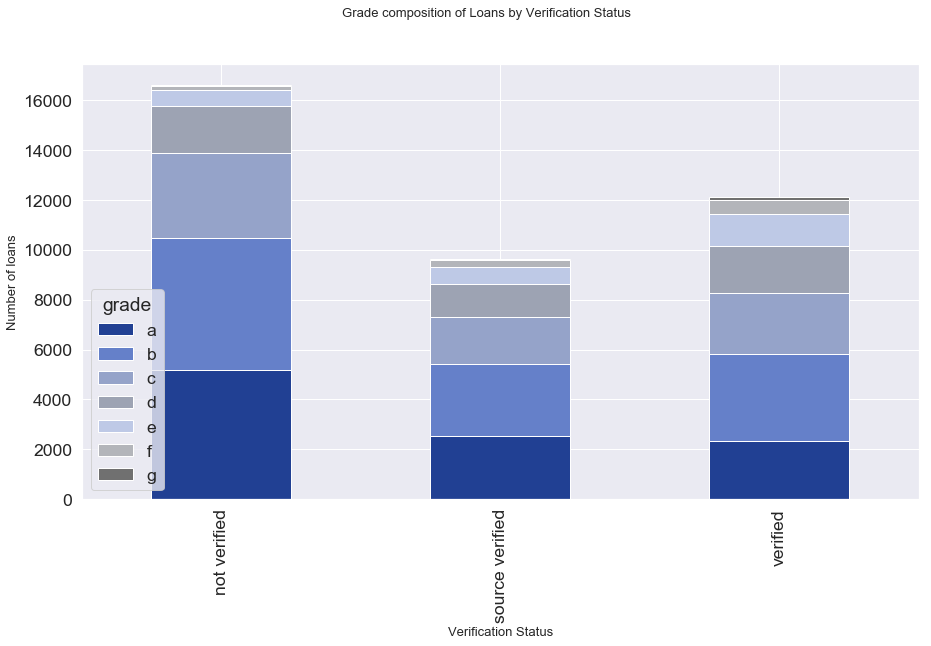

In [136]:
#Dataframe used for plotting stack chart
by_verification_status = loans.groupby(['grade', 'verification_status'])['verification_status'].count().unstack('grade')
#Plot graph
by_verification_status.plot(color=["#214093",'#6580c9','#95a3c9','#9da3b3','#bec9e6','#b3b5ba',"#707070"],kind='bar', stacked=True,figsize=(15,8))
#Labels
plt.xlabel('Verification Status',fontsize=13)
plt.ylabel('Number of loans',fontsize=13)
plt.suptitle('Grade composition of Loans by Verification Status',fontsize=13)

> **Observations**
- Applicants are almost evenly distributed with respect to their verification status
- There appears to be no influence of verification status on charge off

#### grade vs Purpose

Text(0.5, 0.98, 'Grade composition of Loans by Purpose')

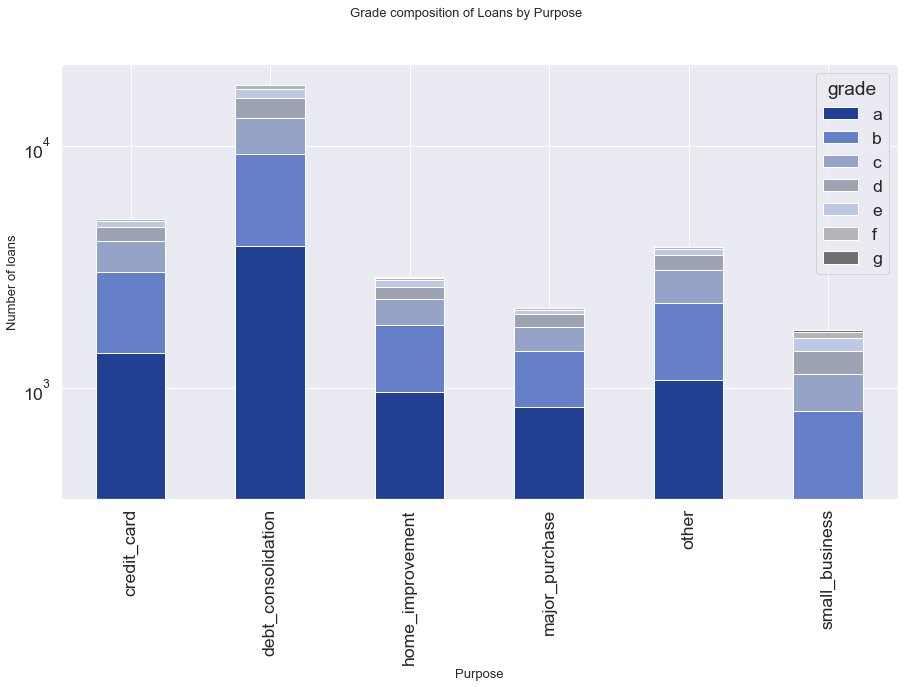

In [137]:
#Dataframe used for plotting stack chart
groupby_purpose_grade = loans.groupby(['grade', 'purpose'])['purpose'].count().unstack('grade')

#Dropping columns with statistically insignificant numbers
groupby_purpose_grade.drop(index=['car', 'wedding', 'medical', 'moving', 'vacation', 'house', 'educational', 'renewable_energy'],inplace=True)
groupby_purpose_grade

#Plot graph
groupby_purpose_grade.plot(color=["#214093",'#6580c9','#95a3c9','#9da3b3','#bec9e6','#b3b5ba',"#707070"],kind='bar', stacked=True,figsize=(15,8))

#Labels
plt.yscale('log')
plt.xlabel('Purpose',fontsize=13)
plt.ylabel('Number of loans',fontsize=13)
plt.suptitle('Grade composition of Loans by Purpose',fontsize=13)


> **Observation:** Most of the loans are for purpose of**debt consolidation** under grade __a__

Now Let's analyse the income variables based on multiple categories

<a id='4.6.2'></a>
#### 4.6.2 Bivariate Analysis with loan Purpose, income category


In [138]:
# Create Labels
purpose_labels = loans['purpose'].unique()

# Categorise based in average income
high_income = loans['int_rate'].loc[loans['income_category'] == 'High'].values.tolist()
medium_income = loans['int_rate'].loc[loans['income_category'] == 'Medium'].values.tolist()
low_income = loans['int_rate'].loc[loans['income_category'] == 'Low'].values.tolist()

# Round off
high_lst = ['%.2f' % val for val in high_income]
med_lst = ['%.2f' % val for val in medium_income]
low_lst = ['%.2f' % val for val in low_income]

high = {"x": high_lst,
          "y": purpose_labels,
          "marker": {"color": "#214093", "size": 16},
          "mode": "markers",
          "name": "High Income",
          "type": "scatter"
}

mid= {"x": med_lst,
          "y": purpose_labels,
          "marker": {"color": "#9da3b3", "size": 16},
          "mode": "markers",
          "name": "Medium Income",
          "type": "scatter",
}

low= {"x": low_lst,
          "y": purpose_labels,
          "marker": {"color": "#707070", "size": 16},
          "mode": "markers",
          "name": "Low Income",
          "type": "scatter",
}
data = [high, mid, low]
layout = {"title": "Purpose Interest Rate by Income Category",
          "xaxis": {"title": "Average Interest Rate", },
          "yaxis": {"title": "Purpose of Loan"}}
fig = go.Figure(data=data, layout=layout)
fig.show()

>**Observations**: We can make the following observations:
* The highest interst rate is for loand taken for major_purchase and these people come in category of low_income.
* low income people take car loans at higher interest rate than medium income.

<a id='4.6.3'></a>
#### 4.6.3 Bivariate Analysis with loan Purpose, loan amount

In this part, we shall analyse the porpose of loan (a categorical variable) with Loan Amount (continous quantitative variable).

> **Note:** we shall be keeping outliers in this analysis.

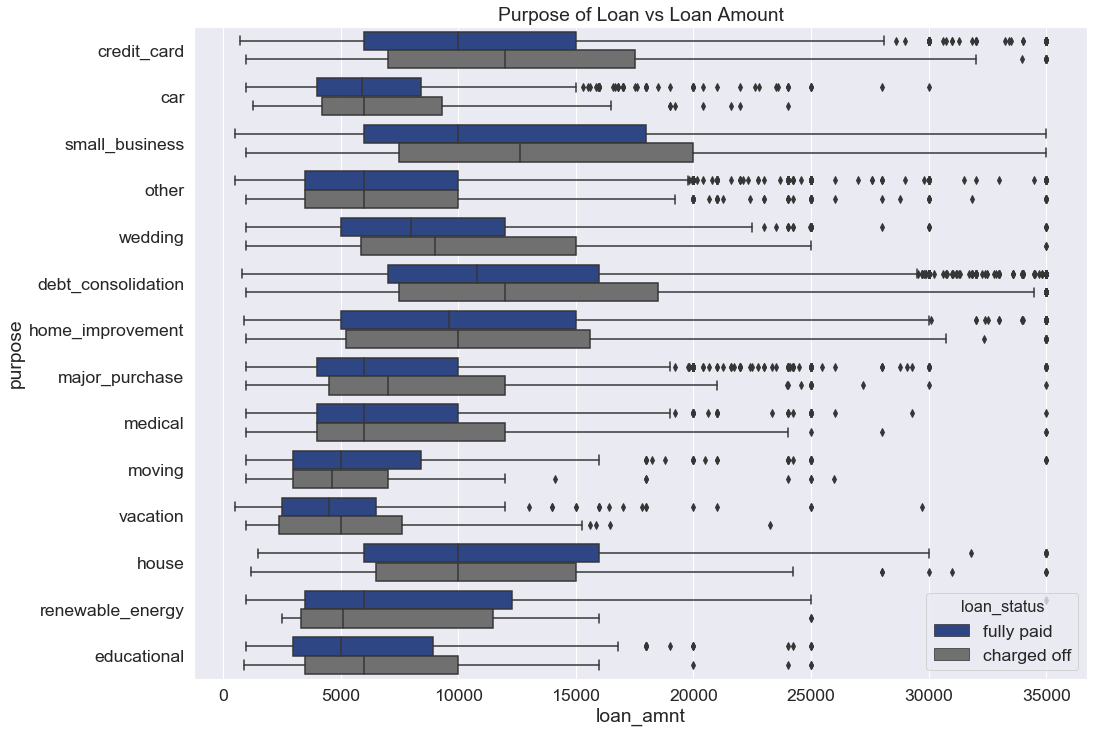

In [139]:
plt.figure(figsize=(16,12))
clrs = ["#707070" if (x != 'fully paid') else "#214093" for x in loans['loan_status'].value_counts().index ]
sns.boxplot(data =loan, y='purpose', x='loan_amnt', hue ='loan_status',palette=clrs)
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

>**Observations:** We can draw below conclusions:
* The highest amount of charged off loans are in debt_consolidation.
* For the below purpose, the charged off debtors have taken loans of higher amounts:
    * credit_card
    * small_business
    * wedding
    * __debt_consolidation__
    * home_imporvement
    * major_purchase
    * vacation
    * educational

<a id='5'></a>
## 5. References

**Domain Research References**

*Lending Club*
- Lending Club Business Model - https://en.wikipedia.org/wiki/LendingClub
- Grading and interest rates - https://www.lendingclub.com/foliofn/rateDetail.action
- Charge-off vs default - https://help.lendingclub.com/hc/en-us/articles/216127747

*General Banking Termminology*
- Payment plan - https://help.lendingclub.com/hc/en-us/articles/215488198-What-is-a-payment-plan-and-how-do-I-track-it-
- Revolving credit utilization - https://www.lendingclub.com/loans/resource-center/what-is-credit-utilization
- Line of Credit - https://www.investopedia.com/terms/l/lineofcredit.asp
- Credit inquiry - https://www.investopedia.com/terms/c/credit-inquiry.asp
- Glossary of bank terms - https://www.helpwithmybank.gov/dictionary/index-dictionary.html
- Glossary of credit card terms - https://www.creditcards.com/credit-card-news/glossary/term-revolving-line-of-credit.php
- Credit enquiry - https://www.myfico.com/credit-education/credit-reports/credit-checks-and-inquiries 
- Zip code format - http://www.zippostalcodes.com/postcodes/us/us-zip-codes-format/